[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/master/Tema_2_AnalisisEstadistico/notebook/3_MonteCarlo.ipynb)

<a id="contenido"></a>
<h1><center>Contenido | Módulo 2</center><h1>
    
---
* [Introducción a los métodos de Monte Carlo con Python](#a)   
* [Monte Carlo Estacionario](#b)
* [Monte Carlo Transitorio](#c)
* [Referencias](#f)

<a id="a"></a>
<h1><center>2.10. Introducción - Monte Carlo</center></h1>

[Regreso a contenido](#contenido)

---
![alt text](https://thumbs.gfycat.com/PeriodicTangibleBushbaby-size_restricted.gif)


![alt text](https://steemitimages.com/p/2bP4pJr4wVimqCWjYimXJe2cnCgn5DUA6MvX91E58ut?format=match&mode=fit&width=640)

Los métodos de Monte Carlo (MC) son un subconjunto de algoritmos computacionales que utilizan el proceso de muestreo aleatorio repetido para realizar estimaciones numéricas de parámetros desconocidos. 

---

Permiten modelar situaciones complejas en las que intervienen muchas variables aleatorias y evaluar el impacto del riesgo. 

Los usos de MC son increíblemente amplios y han llevado a una serie de descubrimientos revolucionarios en los campos de la física, la teoría de juegos y las finanzas, entre otros muchos.... 

Existe un amplio espectro de métodos de Monte Carlo, pero todos comparten el rasgo común de que se basan en la generación de números aleatorios para resolver problemas deterministas. Espero esbozar algunos de los principios básicos de MC, y tal vez compartirles un poco de la emoción que tengo sobre sus posibles aplicaciones.

**NOTA: El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen.**

![img](https://i.imgur.com/EGbQfMo.gif)

### Objetivos

* Aprender como describir fenómenos naturales
* Una breve introducción a diferentes modelos
* ¿Cómo usar estos modelos se pueden simular en una computadora?

## Ejemplos de fenómenos naturales

* Mecánica de fluidos, astrofísica, química, climatología
* Ciencias ambientales (modelado de un río, de un volcan)
* Competencia entre especies, comportamiento de hormigas... etc

## ¿Qué es un modelo?

* Varias definiciones posibles...
  * Simplificación de realidades abstractas, permitirnos un mejor entendimiento y descripción de éstos.
  * Una abstracción donde sólo los "ingredientes esenciales" se mantienen, de acuerdo a ciertas preguntas acerca del sistema
  * Representación de un fenómeno matemático o basado en un lenguaje computacional

## Modelado y simulación

Es una parte importante de la computación. 

  * Describir, clasificar
  * Entendimiento
  * Predicción
  * Control de fenómenos

## Algunos ejemplos de métodos de modelado

* Dinámica molecular
* Ecuaciones matemáticas
* Métodos monte carlo (equilibrio, dinámica...)
* Autómatas celulares
* Sistemas multi-agentes
* Simulación de eventos discretos

## Del modelo a la simulación

Una vez que se ha identificado el modelo, uno necesita "programarlo", "ejecutarlo" (muchas veces) y estudiar los resultados

* Comprensión del programa computacional, de algoritmos, estructuras de los datos, análisis de los datos/resultados
* Verificar, validar y evaluar predicciones

## Modelado de espacio/tiempo y evolución del tiempo

Los procesos naturales ocurren en el espacio y evolucionan con el tiempo...

Por ejemplo, la temperatura ambiental es diferente de un lugar a otro y cambia con el tiempo.

* Un coche cambia su posición con respecto al tiempo...
* En ocasiones, uno sólo está interesado en la evolución del tiempo de una cantidad, independiente de su localización *espacial* en una población
* Además, podemos tener procesos estacionarios....

---

En la evolución del tiempo, la duración de un proceso se puede *descomponer* en pequeños intervalos de tiempo $\Delta$T y podríamos describir el estado del **sistema** en cada uno de estos pasos..

$$ t_0 = 0, t_1 = \Delta t, ... ,t_n = n\Delta t... $$

## Breve ejemplo

Si quisiéramos encontrar la probabilidad de obtener blackjack (un as junto con una carta de valor diez), podríamos simplemente contar el número de manos posibles donde este es el caso y dividir por el número total de combinaciones posibles de cartas para obtener la probabilidad (es alrededor de 1/21, si tiene curiosidad). 

---

Pero ahora imagine que nuestro espacio muestral es mucho más difícil de calcular, por ejemplo, nuestra baraja de cartas tiene miles en lugar de solo 52 cartas, o mejor aún, ni siquiera sabemos cuántas cartas hay. Hay otra forma de encontrar esta probabilidad.

![img](https://media2.giphy.com/media/l2Sq2mPVJr4tfk436/giphy.gif)


Podríamos acomodarnos en la mesa y jugar cien juegos, registrando los resultados mientras jugamos. 

Podríamos obtener un blackjack 19, 20 o incluso 28 veces, y asignar la probabilidad usando cualquiera de esos valores. Parece una forma bastante mala de evaluar nuestras probabilidades en el casino, pero es de esperar que solo estemos jugando por diversión. Ahora, si vamos de nuevo y jugamos mil, diez mil, millones de veces, la [Ley de los Números Grandes](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros) establece:

**A medida que aumenta el número de variables generadas aleatoriamente distribuidas de manera idéntica, su media (promedio) se aproxima a su media teórica.**

Además de ser fácilmente una de las leyes de la estadística más importantes, esta es la base para las simulaciones de Monte Carlo y nos permite construir un modelo estocástico mediante el método de ensayos estadísticos. Veamos mi ejemplo favorito (y probablemente el más simple) de una estimación de [MC](https://www.statisticshowto.com/monte-carlo-simulation/).

## Números aleatorios en Python
---
En Python el módulo random nos proporciona un rápido generador de números pseudoaleatorios basado en el **[algoritmo Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)**; el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

**import [random](https://docs.python.org/3/library/random.html)** - Este módulo implementa generadores de números pseudoaleatorios para varias distribuciones.

**seed** - El método seed () se utiliza para inicializar el generador de números aleatorios.

El generador de números aleatorios necesita un número para comenzar (un valor inicial), para poder generar un número aleatorio.

**<font color=red>Nota: De forma predeterminada, el generador de números aleatorios utiliza la hora actual del sistema.</font>**

In [ ]:
# Utilizando random para genera números aleatorios.
import random

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

## Estimación Monte Carlo de Pi

Como a todos nos enseñan en geometría de la escuela.... **pi** es una constante que representa la relación entre la circunferencia y el diámetro de un círculo. Es irracional, lo que significa que tiene infinitos dígitos que no siguen ningún patrón. ¿Me creerías si te dijera que podemos estimar pi en tantos dígitos como queramos simplemente jugando a los dardos? Con cierto grado de incertidumbre, por supuesto, ¡después de todo estamos jugando un juego de azar! Vamos a escribir un breve script de Python para ver cómo.

In [ ]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

Debemos realizar la siguiente fórmula para obtener aquellos puntos que caen dentro del círculo con respecto a los que pertenecen al área del cuadrado simulado:


![img](https://elfreneticoinformatico.com/wp-content/uploads/2018/11/Screenshot_1-1.png)

----

Además, sabemos de cierta forma que el cálculo de las áreas sería de la siguiente manera:

![img](https://elfreneticoinformatico.com/wp-content/uploads/2018/11/pm2.png)

Debemos seguir el siguiente proceso general:

   * Generamos dos números aleatorios entre -1 y 1
   * Calculamos $X^{2} + Y^{2}$
   
      *  Si el valor es <= 1 estaremos dentro del círculo
      *  Si el valor es > 1 estaremos enconces fuera del círculo
      *  Calculamos el número total de veces (puntos) que están dentro del círculo y dividimos entre el total de intentos.  Así obtenemos la probabilidad (aproximada) de caer en el cículo.
      
Con esa probabilidad podremos aproximar el valor de PI, y repetiremos el experimento un número de veces determinadas para obtener diferentes aproximaciones. Nunca va a ser exacto.

Si ya conoces un poco de esto, te habrás dado cuenta de que estamos haciendo una pequeña trampa: solo estamos usando el cuadrante superior derecho del círculo y del cuadrado (un 25 %; En caso de simular datos aleatorios entre 0 y 1). 

Si quisiéramos usar toda la superficie, deberíamos generar números entre -1 y 1. OJO: siempre suponiendo que nuestro origen de coordenadas está en el centro del círculo.

El código final es el siguiente, es bastante fácil de entender:

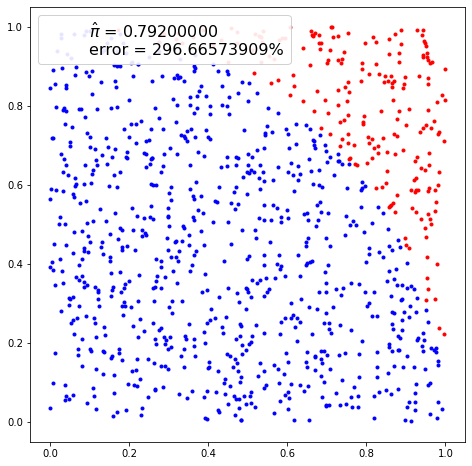

In [ ]:
# Ejemplo: Aproximando el valor de pi

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(0, 1, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de 0 a 1
    
    interior = (x**2 + y**2) <= 1 
    
    pi = interior.sum() / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

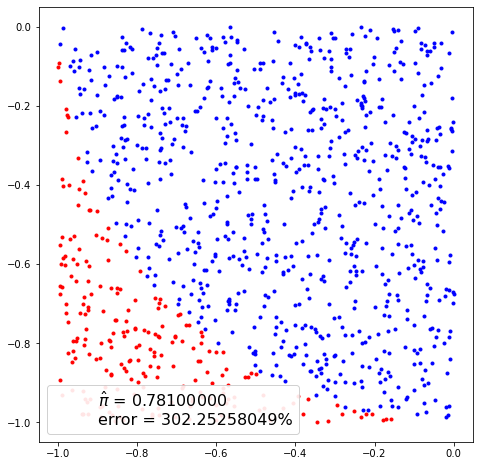

In [ ]:
# Ejemplo: Aproximando el valor de pi

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 0, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de 0 a 1
    
    interior = (x**2 + y**2) <= 1 
    
    pi = interior.sum() / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

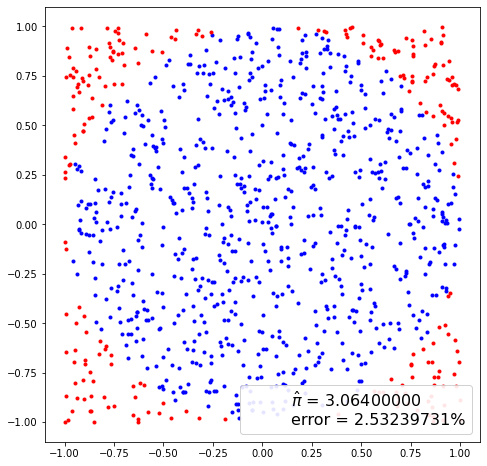

In [ ]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de -1 a 1
    #Lo anterior tiene la finalidad de llenar un cuadrado de 2 dimensiones en el intervalo -1 a 1
    #para posteriormente realizar una comparación de aquellos puntos que caen dentro de la función definida para
    #la circunferencia que es X^2 + Y^2 <= 1
    interior = (x**2 + y**2) <= 1 
    
    # El valor de 4 es debido a los cuadrantes que estamos ocupando
    pi = interior.sum()* 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

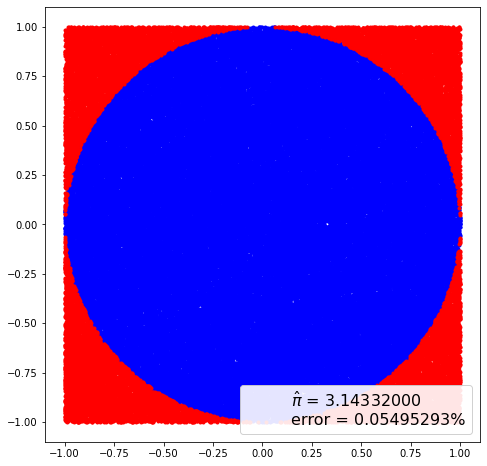

In [ ]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

# Ejemplo práctico

Para este ejemplo, intentaremos predecir cuánto dinero deberíamos tener de presupuesto para dar comisiones de ventas para el próximo año. Este problema es útil para modelar porque tenemos una fórmula definida para calcular las comisiones y probablemente tengamos alguna experiencia con los pagos de comisiones de años anteriores.

Este problema también es importante desde una perspectiva **empresarial**. Las comisiones de venta pueden ser un gran gasto de venta y es importante planificar adecuadamente este gasto. 

---

Además, el uso de una simulación de Monte Carlo es una mejora relativamente simple que puede realizarse para aumentar lo que normalmente es un proceso de estimación poco sofisticado.

En este ejemplo, la comisión de ventas de muestra se vería así para una fuerza de ventas de 5 personas:

![img](https://pbpython.com/images/Excel_Table_1.png)

En este ejemplo, la comisión es el resultado de esta fórmula:

$$Monto de la comisión = Ventas reales * Tasa de comisión$$

La tasa de comisión se basa en esta tabla de Porcentaje para planificar:

![img](https://pbpython.com/images/Excel_Table_4.png)

Antes de construir un modelo y ejecutar la simulación, veamos un enfoque simple para predecir el gasto de comisión del próximo año.

### Enfoque ingenuo del problema

Imagine que su tarea como analista es decirle a los de finanzas cuánto presupuestar para las comisiones de ventas para el próximo año. Un enfoque podría ser asumir que todos obtienen el 100% de su objetivo y ganan la tasa de comisión del 4%. Conectar estos valores en Excel produce esto:

![img](https://pbpython.com/images/Excel_Table_2.png)

Imagínemos que presenta esto al de finanzas y ellos dicen: *Nunca todos obtienen la misma tasa de comisión. Necesitamos un modelo más preciso*.

Para la segunda ronda, puede probar un par de rangos:

![img](https://pbpython.com/images/Excel_Table_6.png)

Ahora, **tenemos** un poco más de información y volvemos con el experto... Esta vez dicen: "*este rango es útil, pero ¿cuál es su confianza en este rango? Además, necesitamos que haga esto para una fuerza de ventas de 500 personas y modele varias tarifas diferentes para determinar la cantidad a presupuestar*". Hmmm ... Ahora, ¿qué haces?


----


Este enfoque simple ilustra el método iterativo básico para una simulación de Monte Carlo. Repite este proceso muchas veces para determinar un rango de posibles valores de comisión para el año. Hacer esto manualmente ... es un desafío. Afortunadamente, Python simplifica mucho este enfoque.

<a id="b"></a>
<h1><center>2.11. Monte Carlo Estacionario</center></h1>

[Regreso a contenido](#contenido)

---

Ahora que hemos cubierto el problema a un alto nivel, podemos discutir cómo el análisis de Monte Carlo podría ser una herramienta útil para predecir los gastos de comisiones para el próximo año. En su nivel más simple, un análisis (o simulación) de Monte Carlo implica ejecutar muchos escenarios con diferentes entradas aleatorias y resumir la distribución de los resultados.

Usando el análisis de comisiones, podemos continuar el proceso manual que comenzamos anteriormente, pero ejecutamos el programa cientos o incluso miles de veces y obtendremos una distribución de los montos de comisiones potenciales. 

Esta distribución puede informar la probabilidad de que el gasto esté dentro de una ventana determinada. Al final del día, esta es una predicción, por lo que probablemente nunca la predeciremos con exactitud. Podemos desarrollar una idea más informada sobre el riesgo potencial de un presupuesto excesivo o insuficiente.

------------

Hay dos componentes para ejecutar una simulación de Monte Carlo:

  * la ecuación para evaluar
  * las variables aleatorias para la entrada

Ya hemos descrito la ecuación anterior. Ahora debemos pensar en cómo poblar las variables aleatorias.

Un enfoque simple sería tomar un número aleatorio entre 0% y 200% (que representa nuestra intuición sobre las tasas de comisiones). Sin embargo, debido a que pagamos comisiones todos los años, entendemos nuestro problema con un poco más de detalle y podemos usar ese conocimiento previo para construir un modelo más preciso.

Debido a que hemos pagado comisiones durante varios años, podemos observar una distribución histórica típica del porcentaje al objetivo:

![img](https://pbpython.com/images/monte_carlo_image_hist_pct.png)

### Construyendo el modelo... en Python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Para este modelo, usaremos una generación de números aleatorios de numpy. El aspecto útil de numpy es que hay varios generadores de números aleatorios que pueden crear muestras aleatorias basadas en una distribución predefinida.

Como se describió anteriormente, sabemos que nuestro porcentaje histórico de rendimiento objetivo se centra en una media del 100% y una desviación estándar del 10%. Definamos esas variables, así como la cantidad de representantes de ventas y simulaciones que estamos modelando:

In [ ]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [ ]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(4)

In [ ]:
pct_to_target

array([1.0144, 0.9096, 1.0544, 1.0182, 0.8659, 0.9388, 1.1331, 0.8836,
       0.8826, 0.9749, 1.1066, 0.8011, 0.9722, 0.9221, 1.1176, 1.0699,
       0.8412, 0.9142, 0.9505, 0.8716, 1.0941, 1.0323, 0.9913, 1.016 ,
       0.9323, 0.9807, 1.0968, 1.0141, 1.1369, 0.9342, 0.9518, 0.9721,
       0.9514, 1.0807, 1.036 , 0.9533, 0.9599, 0.9397, 1.0015, 1.0474,
       0.992 , 0.8411, 0.9033, 1.0761, 1.0399, 1.0832, 1.0005, 1.0062,
       0.8939, 1.0327, 1.0722, 0.9769, 1.0506, 1.1579, 0.957 , 1.1625,
       0.8893, 0.9152, 1.0231, 1.1221, 0.9602, 1.1108, 1.0941, 0.982 ,
       1.05  , 1.0599, 1.0412, 0.9901, 0.9844, 1.1451, 1.1673, 0.9223,
       1.1219, 1.1432, 1.0034, 0.905 , 1.0862, 1.033 , 0.8762, 0.9767,
       0.8173, 1.0757, 0.88  , 0.9102, 1.0946, 0.7828, 1.1808, 0.9577,
       1.0399, 1.0137, 1.2204, 0.806 , 1.2201, 0.8447, 1.0671, 1.0593,
       1.0491, 1.034 , 1.1362, 0.8617, 0.975 , 1.0671, 0.977 , 0.9876,
       0.9206, 0.9943, 0.9645, 1.0605, 0.8571, 0.8757, 1.0504, 0.8936,
      

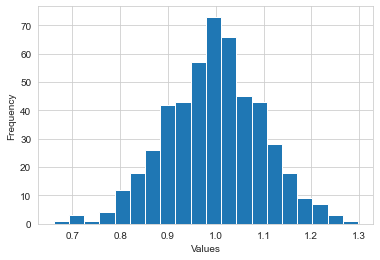

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(pct_to_target, 20)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Dado que estamos tratando de hacer una mejora en nuestro enfoque simple, vamos a seguir con una distribución normal para el porcentaje objetivo. Sin embargo, al usar numpy, podemos ajustar y usar otra distribución para modelos futuros si es necesario....

Hay otro valor que debemos simular y es el objetivo de ventas real. Para ilustrar una distribución diferente, asumiremos que nuestra distribución objetivo de ventas se parece a esto:

![img](https://pbpython.com/images/monte_carlo_sales_target.png)

[numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [ ]:
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

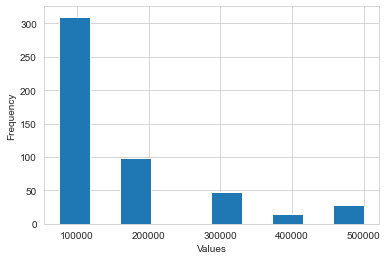

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(sales_target, 10)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

In [ ]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [ ]:
df

Pct_To_Target  Sales_Target     Sales
0           1.0144        200000  202880.0
1           0.9096         75000   68220.0
2           1.0544        100000  105440.0
3           1.0182        300000  305460.0
4           0.8659        200000  173180.0
..             ...           ...       ...
495         1.0005         75000   75037.5
496         1.0926        400000  437040.0
497         1.1056         75000   82920.0
498         1.1085        100000  110850.0
499         1.1346        100000  113460.0

[500 rows x 3 columns]

Puede notar que hice un pequeño truco para calcular el monto real de las ventas. Para este problema, la cantidad real de ventas puede cambiar mucho a lo largo de los años, pero la distribución del rendimiento sigue siendo notablemente constante. Por lo tanto, estoy usando las distribuciones aleatorias para generar mis entradas y respaldar las ventas reales.

La última pieza de código que necesitamos crear es una forma de asignar nuestro Pct_To_Target a la tasa de comisión. Aquí está la función:



In [ ]:
def calc_commission_rate(x):
    """ Con base a la tabla de comisiones:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

El beneficio adicional de usar Python en lugar de Excel es que podemos crear una lógica mucho más compleja que es más fácil de entender que si intentáramos construir una declaración if anidada compleja en Excel.

Ahora creamos nuestra tasa de comisión y la multiplicamos por las ventas:

In [ ]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [ ]:
df.head()

Pct_To_Target  Sales_Target     Sales  Commission_Rate  Commission_Amount
0         1.0144        200000  202880.0             0.04             8115.2
1         0.9096         75000   68220.0             0.03             2046.6
2         1.0544        100000  105440.0             0.04             4217.6
3         1.0182        300000  305460.0             0.04            12218.4
4         0.8659        200000  173180.0             0.02             3463.6

¡Ahí está!

Hemos replicado un modelo que es similar a lo que hubiéramos hecho en Excel, pero usamos algunas distribuciones más sofisticadas que simplemente arrojar un montón de entradas de números aleatorios al problema.

Si sumamos los valores (solo los 5 primeros se muestran arriba) en la columna Commission_Amount, podemos ver que esta simulación muestra que pagaríamos de...

In [ ]:
df['Commission_Amount'].sum().round(2)

2797334.7

### Hagamos más repeticiones...

La verdadera *magia* de la simulación de Monte Carlo es que si ejecutamos una simulación muchas veces, comenzamos a desarrollar una imagen de la distribución probable de los resultados.

Además de ejecutar cada simulación, guardamos los resultados que nos interesan en una lista que convertiremos en un **dataframe** para un análisis más detallado de la distribución de resultados.

Aquí el código...



In [ ]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []

# Podemos fijar el número de iteraciones...
for i in range(num_simulations):

    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [ ]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [ ]:
results_df.describe().round(2).style.format('{:,}')

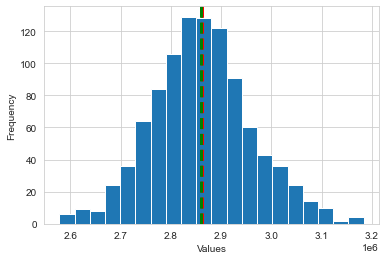

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Aquí radica uno de los beneficios de la simulación de Monte Carlo. 

Desarrolla una mejor comprensión de la distribución de resultados probables y puede utilizar ese conocimiento para hacer una estimación informada.

El otro valor de este modelo es que puede modelar muchas suposiciones diferentes y ver qué sucede.

# Reto !

A continuación, se muestran algunos cambios simples que puede realizar para ver cómo cambian los resultados:

  *  Aumente la tasa de comisión máxima al 5%
  *  Disminuir el número de vendedores.
  *  Cambiar la desviación estándar esperada a una cantidad mayor
  *  Modificar la distribución de objetivos



### Nota importante

* Una simulación de Monte Carlo es una herramienta útil para predecir resultados futuros al calcular una fórmula varias veces con diferentes entradas aleatorias. 

* Usar numpy y pandas para construir un modelo y generar múltiples resultados potenciales y analizarlos es relativamente sencillo. El otro beneficio adicional es que los analistas pueden ejecutar muchos escenarios cambiando las entradas y pueden pasar a modelos mucho más sofisticados en el futuro si surgen las necesidades. Finalmente, los resultados se pueden compartir con usuarios no técnicos y facilitar las discusiones en torno a la incertidumbre de los resultados finales.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_h12 = pd.read_excel('https://raw.githubusercontent.com/DCDPUAEM/DCDP_2022/main/Tema_2_AnalisisEstadistico/data/h12.xlsx')  

In [ ]:
df_h12

Element  Unit       Sample   S  RSD   U
0      Ca  mg/L  3598.922273 NaN   40 NaN
1      Mg  mg/L  1056.487091 NaN   40 NaN
2      Na  mg/L  1680.129729 NaN   40 NaN
3       K  mg/L   249.094420 NaN   40 NaN
4     SO4  mg/L  2896.603374 NaN   40 NaN
5      Cl  mg/L  3509.984386 NaN   40 NaN
6    HCO3  mg/L  1473.160525 NaN   40 NaN
7     CO3  mg/L  4876.165141 NaN   40 NaN

In [ ]:
df_h12['S_Calc'] = (df_h12['Sample']*df_h12['RSD'])/100

In [ ]:
df_h12.head()

Element  Unit       Sample   S  RSD   U       S_Calc
0      Ca  mg/L  3598.922273 NaN   40 NaN  1439.568909
1      Mg  mg/L  1056.487091 NaN   40 NaN   422.594836
2      Na  mg/L  1680.129729 NaN   40 NaN   672.051892
3       K  mg/L   249.094420 NaN   40 NaN    99.637768
4     SO4  mg/L  2896.603374 NaN   40 NaN  1158.641350

In [ ]:
def PosNormal(df, mean_Head, std_Head, repetitions):
    test = pd.DataFrame()
    
    #Conversiones
    for k in range(8):
        val = np.array([1])
        for i in range(11):
            #print(i+(11*k))
            np.random.seed(i+(11*k))
            mu = df[mean_Head][k]
            sigma = df[std_Head][k]
            #np.random.randn(1000000) * sigma + mu
            s = abs(np.random.randn(repetitions) * sigma + mu)#, sigma, repetitions))
            #Corroborar si hay elementos negativos
            #np.concatenate((a, b), axis=0)
            val = np.concatenate((val,s), axis=0)
        #print(val[0])
        val = val[1:]
        test["Element"+str(k)] = val
        print("Element " + str(k))
        print(val.size)
        print(min(val))
        print(max(val))
        print(val.mean())
        print(val.std())
        print(val.std()/val.mean()*100)
        count, bins, ignored = plt.hist(val, 50, density=True)
        plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')

        plt.show()
    return test

Element 0
2200
19.030162915722485
9513.668431345899
3643.093480123416
1427.0276244259126
39.17076605944159


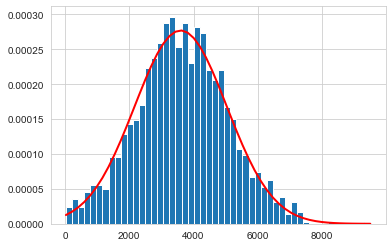

Element 1
2200
5.069251553010872
2470.133333087279
1048.7480240268633
415.1448556205386
39.58480455834497


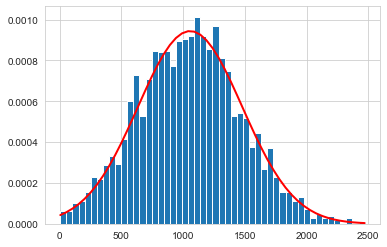

Element 2
2200
4.187096339228674
4366.054092869564
1694.0037420514552
672.4203316393182
39.69414676882653


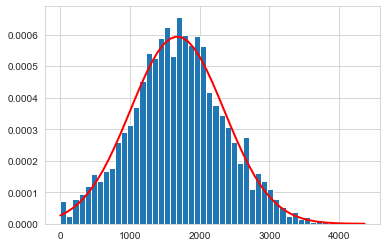

Element 3
2200
0.7013616023141935
591.5941610820232
250.70992506872503
100.66439137861074
40.15173765099904


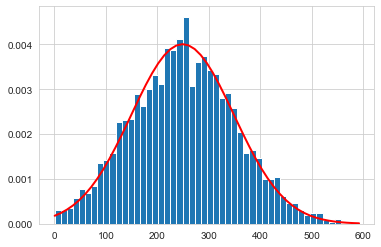

Element 4
2200
41.34294126491295
6736.4281051852995
2893.565171960533
1149.718813775453
39.73364156150877


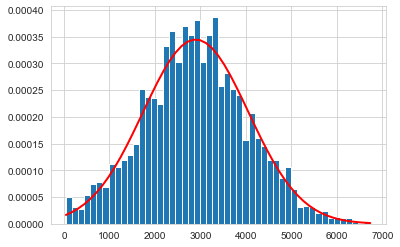

Element 5
2200
17.71381527359472
10231.41531293585
3474.028568328639
1403.708896200616
40.40579599712223


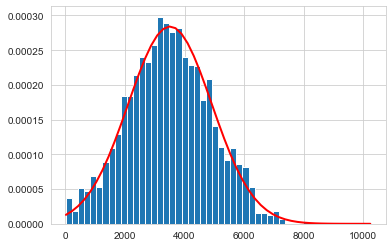

Element 6
2200
1.4496771202966556
3424.231580860477
1487.6581134243893
577.3749252915476
38.810995623349775


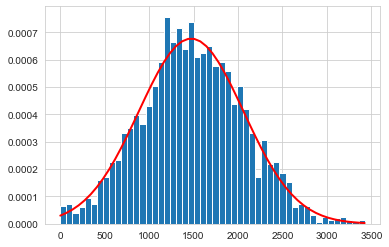

Element 7
2200
24.195032324453678
12744.94045438636
4886.726383741808
1949.6803509135812
39.897473232800365


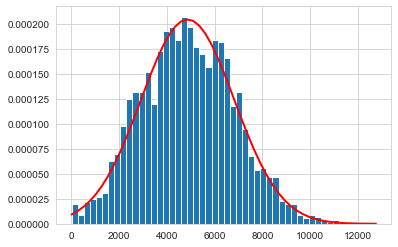

In [ ]:
test = PosNormal(df_h12, 'Sample', 'S_Calc', 200)

In [ ]:
test.describe()

Element0     Element1     Element2     Element3     Element4  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean   3643.093480  1048.748024  1694.003742   250.709925  2893.565172   
std    1427.352059   415.239239   672.573207   100.687277  1149.980203   
min      19.030163     5.069252     4.187096     0.701362    41.342941   
25%    2685.652998   759.189190  1255.681451   180.891674  2142.948341   
50%    3634.217470  1052.769457  1689.634231   249.885286  2870.690463   
75%    4602.370673  1318.628026  2118.682370   318.545706  3644.703657   
max    9513.668431  2470.133333  4366.054093   591.594161  6736.428105   

           Element5     Element6      Element7  
count   2200.000000  2200.000000   2200.000000  
mean    3474.028568  1487.658113   4886.726384  
std     1404.028030   577.506192   1950.123611  
min       17.713815     1.449677     24.195032  
25%     2502.150918  1106.921287   3509.341845  
50%     3452.127973  1471.874448   4846.899603  
75%     4430.746827  1873.269257   6244.704143  
max    10231.415313  3424.231581  12744.940454

In [ ]:
test

Element0     Element1     Element2    Element3     Element4  \
0     6138.397184  1795.797631  1618.334612  217.324569  2026.910125   
1     4174.976149   935.594120   696.682155   89.377015  4421.789401   
2     5007.883045   851.712368  2407.149874   96.128738  4340.432739   
3     6824.842451    64.791631  1519.290797  192.260948  1037.081634   
4     6287.400692  1052.986049  1350.065464  227.500096  1195.551400   
...           ...          ...          ...         ...          ...   
2195  5405.831353  1239.625089  1156.095647  246.565458  5181.261367   
2196  4962.375528  1159.589688  1846.874565  269.549376   511.691189   
2197  2127.235585  1230.341894  1887.092442  127.173688  2457.530916   
2198  5279.141568  1429.544071  2425.293884  295.668090  1708.994043   
2199  2775.522236  1250.495598   730.282373  252.751228  3697.243888   

         Element5     Element6     Element7  
0     1230.276042  2307.331406  5313.937207  
1     3367.080381   833.640093  6166.459824  
2      969.048987  1109.992257  3745.367545  
3     3878.748737  1027.136913  5671.587285  
4     3874.956322  1677.663332  5786.017312  
...           ...          ...          ...  
2195  3245.182971  2025.411222  4501.444348  
2196  4321.232986  1337.873068  3957.555457  
2197  2067.114337  1611.932909  6921.658014  
2198  2876.092784  1606.121397  8221.245798  
2199  3203.076997  1681.213913  4113.932795  

[2200 rows x 8 columns]

### Monte carlo - resultados de apuestas

La idea de una **simulación de Monte Carlo** es probar varias posibilidades de resultados. 

En realidad, solo se cumplirá una de las posibilidades de resultado, pero, en términos de evaluación de riesgos, cualquiera de las posibilidades podría haber ocurrido.

Monte Carlo se utiliza a menudo para evaluar el riesgo de una estrategia comercial determinada, por ejemplo, con opciones o acciones.

---
Los simuladores de Montecarlo pueden ayudar a aclarar que el éxito y el resultado no son la única medida de si una elección fue buena o no. 

Las opciones no deben evaluarse después de su resultado. En cambio, los riesgos y beneficios solo deben considerarse en el momento en que se tomó la decisión, sin sesgos retrospectivos. Un simulador de monte carlo puede ayudar a visualizar la mayoría o todos los resultados potenciales para tener una idea mucho mejor sobre el riesgo de una decisión.

---

Con eso, consideremos un ejemplo básico. Aquí, consideraremos un escenario de juego, donde un usuario puede *lanzar* los dados metafóricos para un resultado de 1 a 100.

* Condiciones: Si el usuario saca algo del 1 al 50, la *casa* gana. Si el usuario obtiene un resultado entre 51 y 99, el "usuario" gana. Si el usuario saca un 100, pierde.

---

Con esto, la casa mantiene una ventaja del 1%, que es mucho menor que la ventaja típica de la casa, así como la ventaja del mercado cuando se incorporan los costos de negociación.

---

Monte Carlo también puede ayudar a ilustrar los defectos de la [falacia del jugador](https://psicologiaymente.com/psicologia/falacia-del-jugador). Muchos jugadores, y en ocasiones especialmente los jugadores que entienden las estadísticas, son víctimas de la falacia del jugador.

La falacia afirma que_ 

* **tomando algo como lanzar una moneda por cara o cruz, tiene una probabilidad conocida de 50/50. Dicho esto, si caen cara cinco veces seguidas, de alguna manera es más probable que caiga cruz a continuación.**

No importa cuántas caras hayan precedido, sus probabilidades, cada vez que lanza la moneda, son 50/50. Es fácil caer en la trampa de pensar que, en una escala a largo plazo, las probabilidades se correlacionarán con 50/50, por lo tanto, si las probabilidades están desequilibradas actualmente, las probabilidades del próximo lanzamiento tampoco son 50/50.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 usuarios ganan. Un 100 perfecto significa que la casa gana.

[100, 44, 40, 28, 82, 50, 10, 32, 91, 85, 36, 7, 23, 15, 68, 83, 52, 41, 87, 25, 24, 50, 91, 96, 19, 81, 46, 98, 48, 66, 70, 93, 81, 77, 79, 33, 33, 80, 60, 53, 47, 61, 25, 65, 42, 88, 66, 73, 68, 20, 82, 66, 67, 56, 44, 11, 53, 13, 82, 51, 22, 17, 81, 78, 7, 63, 41, 27, 66, 66, 84, 79, 51, 37, 96, 3, 66, 24, 40, 87, 54, 88, 15, 60, 28, 100, 66, 15, 63, 35, 25, 91, 16, 94, 74, 87, 28, 79, 4, 47]


(array([ 6.,  9., 11.,  9., 11.,  8., 14.,  8., 14., 10.]),
 array([  3. ,  12.7,  22.4,  32.1,  41.8,  51.5,  61.2,  70.9,  80.6,
         90.3, 100. ]),
 <BarContainer object of 10 artists>)

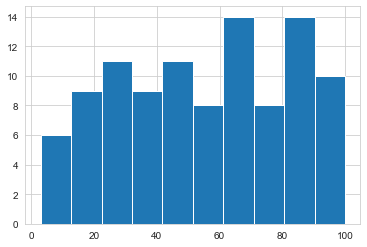

In [ ]:
import random

def rollDice():
    roll = random.randint(1,100)
    return roll

# Now, just to test our dice, let's roll the dice 100 times. 

x = 0
results=[]
for x in range(0,100):
    
    results.append(rollDice())

print(results)
plt.hist(results)

Ahora necesitamos crear un apostador. Eventualmente, crearemos algunos apostadores más sofisticados, pero comenzaremos extremadamente básicos por ahora, ya que incluso el apostador simplista realmente nos mostrará algunas cosas fascinantes en lo que respecta al azar y la posibilidad, usando un generador de monte carlo.

In [ ]:
import random

# let us go ahead and change this to return a simple win/loss
def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        print( roll,'el valor fue de 100, has perdido. Play again!')
        return False
    elif roll <= 50:
        print (roll,'el valor fue de 1-50, has perdido.')
        return False
    elif 100 > roll >= 50:
        print (roll,'el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)')
        return True


'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager

    currentWager = 0

    while currentWager < wager_count:
        if rollDice():
            value += wager
        else:
            value -= wager

        currentWager += 1
        print ('Funds:', value)



simple_bettor(1000,100,100)

29 el valor fue de 1-50, has perdido.
Funds: 900
100 el valor fue de 100, has perdido. Play again!
Funds: 800
25 el valor fue de 1-50, has perdido.
Funds: 700
6 el valor fue de 1-50, has perdido.
Funds: 600
58 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 700
73 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 800
81 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 900
55 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1000
88 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1100
22 el valor fue de 1-50, has perdido.
Funds: 1000
84 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1100
64 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1200
30 el valor fue de 1-50, has perdido.
Funds: 1100
16 el valor fue de 1-50, has perdido.
Funds: 1000
6 el valor fue de 1-50, has perdido.
Funds: 900
53 

Una de las ideas brillantes más comunes que se le ocurren a las personas es duplicar las pérdidas. Por lo tanto, si pierde, simplemente duplica la cantidad de la apuesta anterior. Continúas esto hasta que ganes.

Si tiene dinero ilimitado, esta estrategia funciona, pero no siempre es así.... Todo lo que hace esta estrategia es acelerar el proceso. Una vez más, cada vez que apuesta, se enfrenta a todas las probabilidades. No puedes evitarlos. De todos modos, ¡lo vamos a ilustrar!

ganamos la última apuesta, yay!
900
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1100
ganamos la última apuesta, yay!
1000
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1200
ganamos la última apuesta, yay!
1100
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1300
ganamos la última apuesta, yay!
1200
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1400
ganamos la última apuesta, yay!
1300
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1500
ganamos la última apuesta, yay!
1400
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1600
ganamos la última apuesta, yay!
1500
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
permidos 200
1300
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
permidos 400
900
Perdimos el último, así que s

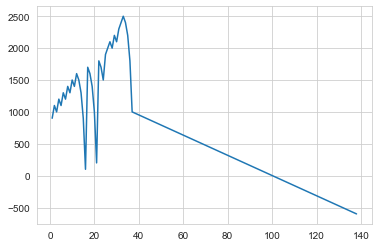

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
#
import time

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # ya que apostaremos basándonos en el resultado de la apuesta anterior #
    previousWager = 'win'

    # ya que estaremos doblando #
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            print ('ganamos la última apuesta, yay!')
            if rollDice():
                value += wager
                print (value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager  
                previousWager = 'loss'
                print (value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print ('perdimos después de',currentWager,' apuestas')
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            print ('Perdimos el último, así que seremos super inteligentes y duplicaremos.!')
            if rollDice():
                wager = previousWagerAmount * 2
                print ('ganamos',wager)
                value += wager
                print (value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                print ('permidos',wager)
                value -= wager
                if value < 0:
                    print ('perdimos después de',currentWager,'apuestas')
                    currentWager += 100
                print (value)
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print ('perdimos después de',currentWager,'apuestas')
                    currentWager += 100

        currentWager += 1

    print( value)
    plt.plot(wX,vY)

doubler_bettor(1000,100,100)
plt.show()


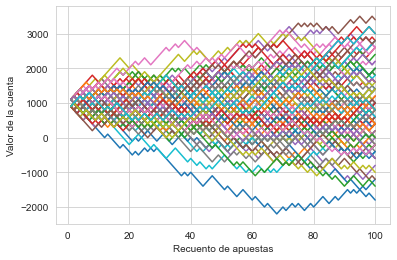

In [ ]:

'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)
        currentWager += 1
    plt.plot(wX,vY)
    
x = 0

while x < 100:
    simple_bettor(1000,100,100)
    x += 1

plt.ylabel('Valor de la cuenta')
plt.xlabel('Recuento de apuestas')
plt.show()

Por eso los jugadores pierden. Por lo general, las probabilidades no están muy en contra de ellos, solo un poco. Los casinos simplemente entienden la psicología básica, sabiendo que *ganar* es extremadamente adictivo. Los casinos están diseñados para mantenerte dentro y seguir jugando.

A corto plazo, la mayoría de los jugadores realmente no se dan cuenta de que es seguro que perderán, las victorias y las derrotas parecen bastante parecidas. Algunas personas, casi la mitad, están estadísticamente seguras de que realmente se beneficiarán. El problema es que esto es adictivo y quieren seguir haciéndolo. Terminan continuando, y la mayoría termina devolviendo sus ganancias. Es simple matemática, pero la psicología humana es débil.

En este punto, los apostadores, con su mente de apostador, comienzan a imaginar varias estrategias para superar sus probabilidades.

Una de las prácticas más comunes aquí es duplicar las pérdidas. Entonces, si pierde, simplemente duplique su apuesta hasta que gane. Una vez que hayas ganado, vuelves a tu punto de partida. Solo necesitamos esa ventaja del 1%, debería ser muy fácil, ¿verdad?



<a id="c"></a>
<h1><center>2.12. Monte Carlo Transitorio</center></h1>

[Regreso a contenido](#contenido)

---

Un proceso estocástico es un concepto matemático que se utiliza para manejar **magnitudes aleatorias** que varían con el tiempo o para caracterizar una sucesión de variables aleatorias llamada estocásticas, que evolucionan en función de otra variable. 

---

### Tipos de procesos estocásticos

Los procesos estocásticos se dividen en dos tipos, que en términos generales y esenciales se pueden definir en impredecibles o en previsibles.

* **Procesos estocásticos estacionarios**: aquellos que la distribución de probabilidad es constante a lo largo de grandes periodos de tiempo.


* **Procesos estocásticos no estacionarios**: son aquellos cuya distribución varia de forma no constante. Es decir,  los datos se comportan de forma totalmente caótica. Los procesos estocásticos no estacionarios están dominados por el azar, son impredecibles. Pero que un proceso sea estocástico no estacionario no quiere decir que sea totalmente caótico. 

¿Cómo escribir una función de python? [Aquí](https://docs.python.org/3/tutorial/classes.html)

Crea una clase "integrador" donde realice la integración de la función: 
$$f(x)=x^{2}e^{−x}sin⁡(x)$$

* Debe proporcionar a la clase el valor mínimo xMin, el valor máximo xMax y el número de intervalos N para la integración. Luego, el proceso de integración debe llevarse a cabo de acuerdo con la siguiente información.

---

Supongamos que: 

$$S=\int_{xMin}^{xMax} f(x)dx\approx\sum_{i=0}^{N-1}f(x_i)\Delta x$$

$$ \Delta x = (xMax-xMin)/N$$

$$x_i=xMin+i\Delta x$$

La clase se compone de tres métodos: _init_, integrar y mostrar:

1. El método de _init_ debe inicializar el xMin, xMax, N y otros parámetros relacionados.

2. El método de integración debe realizar el proceso de integración con los parámetros dados.

3. El método de presentación debe imprimir en la pantalla el resultado de la integración.


Asigne los parámetros con valor: xMin = 1, xMax = 3, N = 200000.

El resultado de la integración de $f(x)$ es igual a ... (5 puntos decimales de precisión):

In [ ]:
import numpy as np
import math

class Integrator:
    xMin = 0
    xMax = 0
    N = 0
    s = 0
    def __init__(self, xMin, xMax, N):
        self.xMin=xMin
        self.xMax=xMax
        self.N=N    
            
    def integrate(self):       
        dx = (self.xMax-self.xMin)/(self.N) 
        for i in range(0,self.N-1):
            xi = self.xMin + i*dx
            fx = np.power(xi,2)*np.power(math.e,-xi)*math.sin(xi)
            self.s=self.s+fx
            print(self.s)
        print(dx)
        self.s=self.s*dx
        
        
    def show(self):
        print(round((self.s),5))
        

examp = Integrator(1,3,200000)
examp.integrate()
examp.show()

0.3095598756531122
0.6191248345550047
0.9286948766835166
1.2382700020164852
1.5478502105317458
1.8574355022071312
2.1670258770204724
2.476621334949599
2.7862218759723376
3.0958275000665134
3.405438207209949
3.7150539973804655
4.024674870555882
4.334300826714014
4.643931865832679
4.953567987889688
5.263209192862852
5.572855480729979
5.882506851468877
6.19216330505735
6.5018248414732005
6.81149146069423
7.1211631626982355
7.4308399474630145
7.740521814966361
8.050208765186069
8.359900798099927
8.669597913685724
8.979300111921246
9.289007392784278
9.598719756252601
9.908437202303997
10.218159730916243
10.527887342067116
10.83762003573439
11.147357811895839
11.457100670529229
11.76684861161233
12.076601635122909
12.38635974103873
12.696122929337553
13.00589119999714
13.315664552995248
13.625442988309631
13.935226505918045
14.245015105798243
14.554808787927973
14.864607552284983
15.174411398847019
15.484220327591823
15.794034338497138
16.103853431540703
16.413677606700258
16.723506863953535

993.3679382560142
993.6932848828042
994.0186365136631
994.3439931485626
994.6693547874743
994.9947214303697
995.3200930772205
995.6454697279981
995.9708513826743
996.2962380412205
996.6216297036083
996.9470263698092
997.2724280397949
997.597834713537
997.9232463910071
998.2486630721764
998.5740847570169
998.8995114454998
999.2249431375969
999.5503798332797
999.8758215325198
1000.2012682352886
1000.5267199415578
1000.8521766512988
1001.1776383644832
1001.5031050810826
1001.8285768010685
1002.1540535244125
1002.479535251086
1002.8050219810606
1003.1305137143078
1003.4560104507992
1003.7815121905063
1004.1070189334007
1004.4325306794537
1004.7580474286372
1005.0835691809223
1005.4090959362808
1005.734627694684
1006.0601644561036
1006.3857062205111
1006.711252987878
1007.0368047581757
1007.3623615313758
1007.6879233074498
1008.0134900863692
1008.3390618681054
1008.6646386526301
1008.9902204399147
1009.3158072299306
1009.6413990226494
1009.9669958180425
1010.2925976160815
1010.6182044167379

1991.7843217587586
1992.1245440262476
1992.4647712038407
1992.8050032915037
1993.1452402892023
1993.4854821969025
1993.8257290145698
1994.1659807421702
1994.5062373796695
1994.8464989270335
1995.186765384228
1995.5270367512187
1995.8673130279715
1996.207594214452
1996.5478803106262
1996.8881713164596
1997.2284672319183
1997.568768056968
1997.9090737915744
1998.2493844357034
1998.5896999893207
1998.930020452392
1999.2703458248832
1999.61067610676
1999.9510112979879
2000.2913513985332
2000.6316964083612
2000.972046327438
2001.312401155729
2001.6527608932004
2001.9931255398176
2002.3334950955466
2002.673869560353
2003.0142489342027
2003.354633217061
2003.6950224088941
2004.0354165096678
2004.3758155193475
2004.716219437899
2005.0566282652885
2005.3970420014812
2005.737460646443
2006.0778842001396
2006.418312662537
2006.7587460336003
2007.0991843132958
2007.4396275015893
2007.780075598446
2008.120528603832
2008.460986517713
2008.8014493400547
2009.1419170708227
2009.4823897099827
2009.8228

3034.024418049201
3034.3792036102323
3034.733993970451
3035.0887891298175
3035.443589088292
3035.798393845834
3036.153203402405
3036.508017757964
3036.8628369124717
3037.217660865889
3037.572489618175
3037.927323169291
3038.282161519197
3038.637004667853
3038.991852615219
3039.3467053612558
3039.7015629059233
3040.0564252491818
3040.4112923909915
3040.7661643313127
3041.1210410701055
3041.4759226073306
3041.830808942948
3042.1857000769173
3042.5405960091994
3042.8954967397544
3043.2504022685425
3043.605312595524
3043.960227720659
3044.315147643908
3044.6700723652307
3045.0250018845877
3045.379936201939
3045.7348753172446
3046.0898192304653
3046.4447679415607
3046.7997214504912
3047.1546797572173
3047.509642861699
3047.8646107638965
3048.21958346377
3048.5745609612795
3048.9295432563854
3049.284530349048
3049.6395222392275
3049.9945189268838
3050.349520411977
3050.704526694468
3051.059537774316
3051.414553651482
3051.7695743259255
3052.124599797607
3052.479630066487
3052.834665132525
30

4263.677277865356
4264.048088174706
4264.418903138376
4264.789722756319
4265.160547028489
4265.531375954842
4265.90220953533
4266.273047769909
4266.643890658533
4267.0147382011555
4267.385590397732
4267.756447248215
4268.127308752561
4268.498174910722
4268.869045722654
4269.23992118831
4269.610801307646
4269.981686080615
4270.352575507171
4270.723469587269
4271.094368320863
4271.465271707908
4271.836179748358
4272.207092442166
4272.5780097892875
4272.948931789676
4273.319858443287
4273.690789750073
4274.061725709989
4274.43266632299
4274.80361158903
4275.174561508063
4275.545516080042
4275.916475304923
4276.287439182659
4276.658407713206
4277.029380896516
4277.400358732545
4277.771341221247
4278.142328362575
4278.513320156485
4278.88431660293
4279.255317701864
4279.626323453243
4279.997333857019
4280.368348913147
4280.739368621582
4281.1103929822775
4281.481421995188
4281.852455660267
4282.22349397747
4282.59453694675
4282.965584568062
4283.33663684136
4283.707693766598
4284.0787553437

5439.163133823394
5439.5481896617775
5439.933250004223
5440.318314850679
5440.703384201094
5441.088458055418
5441.4735364136
5441.858619275589
5442.243706641334
5442.628798510784
5443.0138948838885
5443.398995760596
5443.784101140856
5444.169211024619
5444.554325411831
5444.939444302444
5445.324567696405
5445.709695593665
5446.094827994171
5446.479964897874
5446.865106304723
5447.250252214665
5447.635402627651
5448.02055754363
5448.40571696255
5448.790880884361
5449.176049309012
5449.5612222364525
5449.94639966663
5450.331581599495
5450.716768034996
5451.101958973082
5451.487154413703
5451.872354356807
5452.257558802343
5452.642767750261
5453.027981200509
5453.413199153038
5453.798421607795
5454.183648564729
5454.56888002379
5454.954115984928
5455.33935644809
5455.724601413227
5456.109850880286
5456.495104849218
5456.8803633199705
5457.265626292493
5457.650893766735
5458.036165742646
5458.421442220173
5458.806723199267
5459.192008679877
5459.577298661951
5459.962593145439
5460.34789213

6725.660957108145
6726.0604989826
6726.460045185776
6726.859595717618
6727.259150578069
6727.6587097670745
6728.058273284578
6728.457841130523
6728.857413304854
6729.256989807515
6729.65657063845
6730.0561557976025
6730.455745284917
6730.855339100337
6731.254937243807
6731.65453971527
6732.054146514672
6732.453757641954
6732.853373097062
6733.2529928799395
6733.652616990531
6734.052245428779
6734.451878194629
6734.8515152880245
6735.25115670891
6735.650802457228
6736.0504525329225
6736.4501069359385
6736.84976566622
6737.2494287237105
6737.649096108354
6738.048767820094
6738.448443858876
6738.848124224643
6739.247808917337
6739.647497936905
6740.047191283289
6740.446888956434
6740.846590956284
6741.246297282782
6741.646007935872
6742.045722915499
6742.445442221606
6742.845165854137
6743.2448938130365
6743.6446260982475
6744.044362709715
6744.444103647382
6744.843848911192
6745.243598501091
6745.643352417021
6746.043110658927
6746.4428732267515
6746.84264012044
6747.242411339936
6747.64

8034.301722965475
8034.714904762751
8035.128090700723
8035.54128077933
8035.954474998512
8036.367673358207
8036.780875858356
8037.194082498897
8037.60729327977
8038.020508200913
8038.433727262267
8038.846950463771
8039.260177805363
8039.673409286984
8040.0866449085715
8040.4998846700655
8040.913128571406
8041.326376612531
8041.739628793381
8042.152885113894
8042.566145574009
8042.979410173667
8043.392678912806
8043.805951791366
8044.219228809286
8044.632509966505
8045.045795262962
8045.459084698597
8045.872378273349
8046.2856759871565
8046.698977839959
8047.112283831697
8047.525593962308
8047.938908231733
8048.3522266399095
8048.765549186778
8049.178875872277
8049.592206696346
8050.005541658924
8050.418880759951
8050.832223999366
8051.245571377108
8051.658922893115
8052.072278547328
8052.4856383396855
8052.899002270127
8053.312370338592
8053.725742545019
8054.139118889348
8054.552499371517
8054.965883991466
8055.3792727491345
8055.792665644461
8056.206062677385
8056.6194638478455
8057.

9465.202379119242
9465.629302956831
9466.05623072036
9466.483162409764
9466.910098024979
9467.337037565938
9467.763981032576
9468.190928424829
9468.61787974263
9469.044834985913
9469.471794154615
9469.89875724867
9470.32572426801
9470.752695212574
9471.179670082294
9471.606648877105
9472.033631596942
9472.46061824174
9472.887608811432
9473.314603305955
9473.741601725242
9474.168604069228
9474.595610337848
9475.022620531037
9475.44963464873
9475.87665269086
9476.303674657363
9476.730700548173
9477.157730363224
9477.584764102452
9478.011801765791
9478.438843353175
9478.865888864539
9479.292938299817
9479.719991658947
9480.14704894186
9480.574110148493
9481.001175278778
9481.428244332652
9481.855317310048
9482.282394210903
9482.709475035148
9483.13655978272
9483.563648453555
9483.990741047584
9484.417837564744
9484.84493800497
9485.272042368195
9485.699150654355
9486.126262863383
9486.553378995215
9486.980499049785
9487.407623027028
9487.834750926879
9488.261882749272
9488.68901849414
948

11016.470949897233
11016.911485725788
11017.352025238677
11017.792568435829
11018.233115317174
11018.673665882645
11019.114220132169
11019.554778065678
11019.9953396831
11020.43590498437
11020.876473969414
11021.317046638163
11021.757622990548
11022.198203026499
11022.638786745947
11023.079374148821
11023.519965235053
11023.96056000457
11024.401158457307
11024.84176059319
11025.282366412152
11025.722975914121
11026.16358909903
11026.604205966805
11027.04482651738
11027.485450750684
11027.926078666647
11028.366710265202
11028.807345546275
11029.247984509799
11029.688627155701
11030.129273483915
11030.56992349437
11031.010577186995
11031.451234561722
11031.89189561848
11032.332560357201
11032.773228777813
11033.213900880246
11033.654576664432
11034.095256130302
11034.535939277785
11034.976626106809
11035.417316617308
11035.85801080921
11036.298708682445
11036.739410236944
11037.180115472636
11037.620824389454
11038.061536987327
11038.502253266184
11038.942973225956
11039.383696866573
110

12389.996058315915
12390.447602202168
12390.899149552659
12391.350700367315
12391.802254646063
12392.25381238883
12392.705373595541
12393.156938266126
12393.60850640051
12394.060077998618
12394.51165306038
12394.96323158572
12395.414813574567
12395.866399026849
12396.31798794249
12396.769580321417
12397.221176163559
12397.67277546884
12398.124378237188
12398.575984468529
12399.027594162792
12399.479207319902
12399.930823939787
12400.382444022373
12400.834067567586
12401.285694575356
12401.737325045606
12402.188958978264
12402.640596373258
12403.092237230514
12403.543881549958
12403.995529331518
12404.44718057512
12404.898835280692
12405.350493448159
12405.802155077448
12406.253820168487
12406.705488721203
12407.157160735522
12407.60883621137
12408.060515148674
12408.512197547363
12408.963883407361
12409.415572728596
12409.867265510995
12410.318961754485
12410.770661458992
12411.222364624442
12411.674071250764
12412.125781337882
12412.577494885725
12413.02921189422
12413.480932363293
12

13961.90710643766
13962.370117804585
13962.833132378175
13963.296150158356
13963.759171145048
13964.222195338176
13964.685222737664
13965.148253343434
13965.61128715541
13966.074324173516
13966.537364397675
13967.000407827809
13967.463454463843
13967.9265043057
13968.389557353303
13968.852613606574
13969.31567306544
13969.77873572982
13970.24180159964
13970.704870674825
13971.167942955295
13971.631018440974
13972.094097131787
13972.557179027655
13973.020264128503
13973.483352434254
13973.946443944831
13974.409538660158
13974.872636580158
13975.335737704754
13975.79884203387
13976.261949567428
13976.725060305353
13977.188174247567
13977.651291393995
13978.114411744558
13978.577535299182
13979.040662057789
13979.503792020301
13979.966925186643
13980.430061556739
13980.893201130511
13981.356343907883
13981.819489888776
13982.282639073117
13982.745791460828
13983.208947051831
13983.67210584605
13984.135267843409
13984.59843304383
13985.061601447238
13985.524773053556
13985.987947862706
139

15601.529195551077
15602.002954450163
15602.476716282144
15602.950481046943
15603.424248744477
15603.898019374668
15604.371792937436
15604.8455694327
15605.319348860383
15605.793131220404
15606.26691651268
15606.740704737136
15607.214495893691
15607.688289982265
15608.162087002776
15608.635886955148
15609.109689839299
15609.58349565515
15610.05730440262
15610.53111608163
15611.004930692101
15611.478748233953
15611.952568707105
15612.42639211148
15612.900218446995
15613.374047713573
15613.84787991113
15614.321715039592
15614.795553098875
15615.2693940889
15615.743238009589
15616.21708486086
15616.690934642636
15617.164787354835
15617.638642997379
15618.112501570185
15618.586363073176
15619.060227506272
15619.534094869394
15620.00796516246
15620.48183838539
15620.955714538108
15621.42959362053
15621.90347563258
15622.377360574175
15622.851248445237
15623.325139245684
15623.79903297544
15624.272929634422
15624.746829222551
15625.220731739748
15625.694637185932
15626.168545561026
15626.642

17244.196096619224
17244.679446428065
17245.162798891535
17245.646154009555
17246.12951178204
17246.61287220891
17247.09623529008
17247.579601025467
17248.06296941499
17248.546340458568
17249.029714156117
17249.513090507553
17249.996469512796
17250.479851171764
17250.963235484374
17251.446622450545
17251.930012070192
17252.413404343235
17252.89679926959
17253.380196849175
17253.86359708191
17254.346999967707
17254.830405506487
17255.31381369817
17255.797224542668
17256.2806380399
17256.76405418979
17257.247472992247
17257.730894447195
17258.21431855455
17258.697745314228
17259.18117472615
17259.66460679023
17260.148041506385
17260.631478874537
17261.1149188946
17261.59836156649
17262.08180689013
17262.565254865436
17263.04870549232
17263.532158770708
17264.01561470051
17264.49907328165
17264.982534514045
17265.46599839761
17265.94946493226
17266.432934117915
17266.916405954496
17267.399880441917
17267.883357580096
17268.366837368954
17268.850319808404
17269.333804898364
17269.817292638

18909.268629514016
18909.76055793292
18910.252488721406
18910.744421879383
18911.23635740677
18911.72829530348
18912.22023556943
18912.71217820454
18913.204123208718
18913.696070581882
18914.188020323945
18914.679972434828
18915.17192691444
18915.663883762703
18916.155842979526
18916.64780456483
18917.139768518526
18917.631734840532
18918.123703530764
18918.615674589135
18919.10764801556
18919.599623809958
18920.091601972243
18920.583582502328
18921.07556540013
18921.567550665564
18922.05953829855
18922.551528298998
18923.043520666826
18923.53551540195
18924.02751250428
18924.519511973736
18925.011513810234
18925.503518013687
18925.995524584014
18926.487533521125
18926.97954482494
18927.47155849537
18927.963574532336
18928.45559293575
18928.947613705528
18929.439636841587
18929.93166234384
18930.423690212203
18930.915720446592
18931.407753046922
18931.899788013106
18932.391825345065
18932.88386504271
18933.375907105958
18933.867951534725
18934.359998328924
18934.85204748847
18935.34409

20471.150996559158
20471.649971007937
20472.148947556998
20472.647926206257
20473.146906955622
20473.645889805015
20474.144874754344
20474.643861803524
20475.14285095247
20475.641842201094
20476.140835549308
20476.63983099703
20477.138828544168
20477.637828190644
20478.136829936364
20478.635833781245
20479.134839725204
20479.63384776815
20480.132857909997
20480.63187015066
20481.130884490056
20481.629900928092
20482.128919464685
20482.627940099752
20483.1269628332
20483.62598766495
20484.12501459491
20484.624043622996
20485.12307474912
20485.6221079732
20486.121143295146
20486.620180714872
20487.119220232293
20487.61826184732
20488.117305559874
20488.616351369863
20489.1153992772
20489.614449281802
20490.113501383577
20490.612555582444
20491.111611878317
20491.610670271108
20492.10973076073
20492.6087933471
20493.107858030125
20493.606924809726
20494.105993685815
20494.605064658303
20495.104137727103
20495.603212892132
20496.102290153303
20496.60136951053
20497.100450963724
20497.59953

22229.803450408053
22230.309244475837
22230.815040339312
22231.32083799839
22231.826637452985
22232.332438703008
22232.838241748374
22233.34404658899
22233.849853224772
22234.35566165563
22234.86147188148
22235.36728390223
22235.873097717795
22236.378913328088
22236.884730733018
22237.3905499325
22237.896370926446
22238.40219371477
22238.90801829738
22239.413844674193
22239.919672845113
22240.42550281006
22240.931334568944
22241.437168121676
22241.94300346817
22242.44884060834
22242.954679542094
22243.460520269346
22243.966362790008
22244.472207103994
22244.978053211216
22245.483901111584
22245.989750805013
22246.495602291412
22247.001455570695
22247.507310642774
22248.01316750756
22248.51902616497
22249.024886614912
22249.5307488573
22250.036612892047
22250.542478719064
22251.048346338262
22251.554215749555
22252.060086952853
22252.56595994807
22253.07183473512
22253.577711313912
22254.08358968436
22254.589469846374
22255.09535179987
22255.60123554476
22256.107121080953
22256.61300840

23754.357221465794
23754.868004878736
23755.37878982276
23755.88957629778
23756.40036430371
23756.911153840458
23757.421944907936
23757.932737506057
23758.44353163473
23758.954327293868
23759.46512448338
23759.97592320318
23760.486723453178
23760.997525233284
23761.508328543412
23762.01913338347
23762.529939753374
23763.04074765303
23763.551557082355
23764.062368041257
23764.573180529645
23765.083994547436
23765.594810094535
23766.10562717086
23766.616445776315
23767.127265910818
23767.638087574276
23768.148910766602
23768.65973548771
23769.170561737505
23769.681389515903
23770.192218822813
23770.703049658146
23771.213882021817
23771.724715913733
23772.235551333808
23772.746388281954
23773.25722675808
23773.7680667621
23774.27890829392
23774.789751353455
23775.30059594062
23775.811442055317
23776.322289697466
23776.833138866976
23777.343989563757
23777.85484178772
23778.365695538778
23778.87655081684
23779.38740762182
23779.898265953627
23780.409125812173
23780.91998719737
23781.430850

25550.83968520414
25551.35528267803
25551.8708813712
25552.386481283567
25552.90208241504
25553.41768476553
25553.933288334945
25554.4488931232
25554.9644991302
25555.480106355863
25555.995714800094
25556.511324462805
25557.026935343903
25557.542547443303
25558.058160760917
25558.573775296652
25559.08939105042
25559.60500802213
25560.120626211694
25560.63624561902
25561.151866244025
25561.667488086612
25562.183111146696
25562.698735424186
25563.214360918995
25563.72998763103
25564.245615560205
25564.761244706428
25565.276875069612
25565.792506649665
25566.308139446497
25566.823773460022
25567.33940869015
25567.85504513679
25568.37068279985
25568.886321679245
25569.401961774885
25569.91760308668
25570.43324561454
25570.948889358373
25571.464534318096
25571.980180493614
25572.49582788484
25573.011476491683
25573.527126314057
25574.042777351868
25574.55842960503
25575.07408307345
25575.589737757044
25576.10539365572
25576.621050769383
25577.13670909795
25577.652368641335
25578.16802939944

27361.738197285595
27362.25751284841
27362.77682931687
27363.296146690886
27363.815464970365
27364.334784155217
27364.854104245354
27365.37342524069
27365.89274714113
27366.412069946586
27366.931393656967
27367.450718272186
27367.970043792153
27368.489370216776
27369.008697545967
27369.528025779633
27370.04735491769
27370.566684960042
27371.086015906603
27371.605347757282
27372.124680511988
27372.644014170633
27373.163348733127
27373.68268419938
27374.2020205693
27374.7213578428
27375.240696019795
27375.760035100186
27376.279375083886
27376.79871597081
27377.318057760862
27377.837400453955
27378.356744049997
27378.876088548903
27379.39543395058
27379.914780254938
27380.43412746189
27380.95347557134
27381.472824583205
27381.99217449739
27382.51152531381
27383.03087703237
27383.550229652985
27384.069583175562
27384.588937600012
27385.10829292625
27385.627649154176
27386.147006283707
27386.666364314755
27387.18572324723
27387.705083081037
27388.22444381609
27388.743805452297
27389.2631679

29184.24692363045
29184.768858993193
29185.290794947232
29185.812731492482
29186.33466862885
29186.856606356247
29187.378544674582
29187.90048358377
29188.422423083714
29188.94436317433
29189.466303855526
29189.988245127213
29190.5101869893
29191.032129441697
29191.554072484316
29192.076016117066
29192.597960339855
29193.1199051526
29193.641850555203
29194.16379654758
29194.685743129638
29195.20769030129
29195.729638062443
29196.25158641301
29196.773535352902
29197.295484882026
29197.817435000296
29198.33938570762
29198.861337003906
29199.38328888907
29199.905241363012
29200.427194425654
29200.9491480769
29201.47110231666
29201.993057144846
29202.51501256137
29203.036968566135
29203.55892515906
29204.08088234005
29204.60284010902
29205.124798465873
29205.646757410523
29206.16871694288
29206.690677062856
29207.21263777036
29207.7345990653
29208.25656094759
29208.77852341714
29209.300486473854
29209.82245011765
29210.344414348434
29210.866379166117
29211.38834457061
29211.910310561823
29

31013.47736499988
31014.000820447454
31014.52427617272
31015.04773217559
31015.57118845597
31016.094645013774
31016.61810184891
31017.14155896129
31017.665016350827
31018.18847401743
31018.711931961006
31019.235390181468
31019.758848678728
31020.282307452697
31020.805766503283
31021.329225830395
31021.852685433947
31022.37614531385
31022.899605470015
31023.42306590235
31023.946526610765
31024.469987595174
31024.993448855483
31025.516910391605
31026.040372203453
31026.563834290937
31027.087296653965
31027.61075929245
31028.1342222063
31028.657685395425
31029.181148859738
31029.704612599147
31030.228076613566
31030.751540902904
31031.275005467072
31031.79847030598
31032.321935419543
31032.845400807662
31033.368866470257
31033.89233240723
31034.415798618502
31034.939265103974
31035.46273186356
31035.986198897175
31036.50966620472
31037.033133786117
31037.556601641267
31038.080069770087
31038.603538172483
31039.12700684837
31039.65047579765
31040.173945020244
31040.697414516057
31041.22088

32721.426099594955
32721.949986307936
32722.473873007984
32722.997759695012
32723.52164636893
32724.04553302965
32724.569419677082
32725.09330631114
32725.61719293173
32726.14107953877
32726.664966132168
32727.188852711835
32727.712739277682
32728.23662582962
32728.76051236756
32729.284398891414
32729.808285401094
32730.33217189651
32730.856058377572
32731.379944844197
32731.90383129629
32732.427717733768
32732.951604156537
32733.47549056451
32733.999376957596
32734.523263335708
32735.04714969876
32735.57103604666
32736.094922379318
32736.618808696647
32737.14269499856
32737.666581284968
32738.190467555778
32738.714353810905
32739.23824005026
32739.762126273756
32740.2860124813
32740.809898672807
32741.333784848186
32741.857671007347
32742.381557150202
32742.905443276664
32743.429329386643
32743.95321548005
32744.477101556797
32745.000987616793
32745.524873659953
32746.048759686186
32746.572645695403
32747.09653168752
32747.62041766244
32748.14430362008
32748.66818956035
32749.19207548

34503.55660690692
34504.07993746408
34504.603267707775
34505.126597637915
34505.64992725441
34506.17325655717
34506.69658554612
34507.219914221154
34507.7432425822
34508.26657062916
34508.78989836195
34509.31322578048
34509.83655288467
34510.359879674426
34510.88320614966
34511.406532310284
34511.92985815621
34512.45318368735
34512.97650890362
34513.49983380493
34514.023158391195
34514.54648266232
34515.06980661822
34515.593130258814
34516.11645358401
34516.639776593714
34517.16309928784
34517.68642166631
34518.20974372902
34518.7330654759
34519.25638690685
34519.779708021786
34520.30302882062
34520.826349303265
34521.34966946964
34521.87298931964
34522.3963088532
34522.91962807021
34523.442946970594
34523.96626555426
34524.48958382112
34525.01290177109
34525.536219404086
34526.05953672001
34526.58285371878
34527.1061704003
34527.6294867645
34528.15280281127
34528.67611854054
34529.19943395221
34529.72274904621
34530.24606382244
34530.769378280806
34531.29269242123
34531.816006243615
3

36162.04137930898
36162.563275223314
36163.08517054736
36163.60706528104
36164.128959424255
36164.650852976934
36165.17274593898
36165.69463831031
36166.216530090845
36166.73842128048
36167.260311879145
36167.782201886745
36168.304091303195
36168.82598012841
36169.347868362296
36169.86975600478
36170.391643055766
36170.91352951517
36171.435415382904
36171.95730065888
36172.47918534302
36173.001069435224
36173.52295293541
36174.044835843495
36174.566718159396
36175.08859988302
36175.61048101428
36176.13236155309
36176.65424149937
36177.17612085302
36177.69799961396
36178.21987778211
36178.741755357376
36179.26363233967
36179.78550872891
36180.30738452501
36180.829259727885
36181.35113433744
36181.8730083536
36182.394881776265
36182.91675460536
36183.43862684079
36183.96049848247
36184.48236953031
36185.004239984235
36185.52610984415
36186.04797910997
36186.56984778161
36187.09171585898
36187.613583342
36188.13545023058
36188.65731652462
36189.179182224056
36189.70104732879
36190.2229118

37834.85086897639
37835.370424480614
37835.88997911851
37836.40953288999
37836.929085794975
37837.44863783337
37837.96818900509
37838.48773931006
37839.00728874819
37839.52683731939
37840.04638502358
37840.56593186068
37841.085477830595
37841.60502293324
37842.12456716853
37842.64411053639
37843.163653036725
37843.68319466945
37844.20273543448
37844.72227533174
37845.241814361136
37845.76135252258
37846.28088981599
37846.80042624129
37847.31996179838
37847.83949648718
37848.3590303076
37848.87856325956
37849.39809534298
37849.91762655777
37850.43715690384
37850.95668638111
37851.476214989496
37851.99574272891
37852.51526959927
37853.03479560049
37853.55432073248
37854.07384499516
37854.59336838844
37855.11289091224
37855.632412566476
37856.15193335106
37856.6714532659
37857.19097231093
37857.71049048604
37858.23000779116
37858.7495242262
37859.26903979108
37859.788554485705
37860.308068310005
37860.82758126388
37861.347093347256
37861.86660456004
37862.38611490215
37862.905624373496
37

39621.067321348
39621.5833856492
39622.09944879322
39622.61551077995
39623.131571609316
39623.64763128124
39624.16368979563
39624.679747152404
39625.19580335148
39625.71185839278
39626.22791227622
39626.743965001704
39627.26001656916
39627.776066978506
39628.29211622965
39628.80816432251
39629.32421125701
39629.84025703306
39630.35630165058
39630.872345109485
39631.388387409694
39631.90442855112
39632.42046853368
39632.93650735729
39633.45254502187
39633.96858152733
39634.4846168736
39635.00065106058
39635.5166840882
39636.032715956375
39636.548746665016
39637.064776214036
39637.580804603356
39638.096831832896
39638.61285790257
39639.12888281229
39639.64490656199
39640.16092915156
39640.67695058094
39641.19297085004
39641.708989958766
39642.22500790704
39642.74102469479
39643.25704032192
39643.773054788355
39644.289068094
39644.80508023879
39645.32109122262
39645.83710104542
39646.3531097071
39646.869117207585
39647.38512354678
39647.90112872461
39648.41713274099
39648.93313559584
3964

41412.96484713031
41413.47637336072
41413.987898146595
41414.49942148785
41415.01094338442
41415.522463836205
41416.03398284313
41416.54550040511
41417.05701652207
41417.56853119392
41418.080044420596
41418.591556202
41419.10306653806
41419.614575428684
41420.1260828738
41420.637588873324
41421.14909342717
41421.660596535265
41422.17209819752
41422.68359841387
41423.19509718421
41423.70659450847
41424.21809038657
41424.72958481842
41425.241077803956
41425.75256934308
41426.26405943572
41426.775548081794
41427.28703528122
41427.79852103391
41428.31000533979
41428.82148819877
41429.33296961078
41429.844449575736
41430.35592809355
41430.86740516415
41431.378880787444
41431.89035496336
41432.401827691814
41432.91329897272
41433.424768806006
41433.936237191585
41434.44770412937
41434.959169619295
41435.470633661265
41435.982096255204
41436.49355740102
41437.00501709865
41437.516475348006
41438.027932149
41438.53938750156
41439.050841405595
41439.56229386103
41440.07374486778
41440.585194425

42946.76359885239
42947.27040819204
42947.77721584507
42948.2840218114
42948.79082609095
42949.29762868365
42949.804429589414
42950.31122880816
42950.81802633982
42951.3248221843
42951.83161634154
42952.33840881143
42952.84519959392
42953.35198868891
42953.85877609634
42954.36556181612
42954.87234584817
42955.37912819241
42955.885908848766
42956.392687817155
42956.89946509749
42957.40624068971
42957.913014593716
42958.41978680944
42958.9265573368
42959.43332617572
42959.94009332612
42960.44685878792
42960.953622561035
42961.46038464539
42961.96714504091
42962.47390374751
42962.980660765104
42963.48741609362
42963.994169732985
42964.50092168312
42965.00767194393
42965.51442051535
42966.02116739729
42966.52791258968
42967.03465609244
42967.54139790548
42968.04813802873
42968.55487646211
42969.061613205544
42969.568348258945
42970.075081622235
42970.581813295335
42971.08854327817
42971.59527157066
42972.10199817272
42972.60872308428
42973.11544630525
42973.62216783556
42974.12888767512
42

44321.293473709666
44321.795394795365
44322.29731398077
44322.79923126581
44323.301146650396
44323.80306013446
44324.304971717924
44324.80688140071
44325.308789182745
44325.81069506394
44326.31259904423
44326.814501123525
44327.31640130175
44327.81829957884
44328.32019595471
44328.822090429276
44329.32398300247
44329.82587367421
44330.327762444416
44330.82964931302
44331.33153427993
44331.833417345086
44332.3352985084
44332.8371777698
44333.339055129196
44333.84093058653
44334.34280414171
44334.84467579466
44335.346545545304
44335.84841339357
44336.35027933938
44336.852143382646
44337.3540055233
44337.85586576127
44338.35772409646
44338.859580528806
44339.36143505823
44339.86328768465
44340.365138408
44340.86698722819
44341.36883414514
44341.87067915878
44342.37252226904
44342.87436347583
44343.37620277907
44343.8780401787
44344.37987567463
44344.88170926679
44345.38354095509
44345.88537073946
44346.38719861982
44346.8890245961
44347.39084866822
44347.892670836096
44348.39449109966
443

45914.81797653218
45915.313435146
45915.808891615976
45916.304345942015
45916.79979812405
45917.295248162
45917.790696055796
45918.286141805365
45918.78158541062
45919.2770268715
45919.772466187926
45920.26790335982
45920.7633383871
45921.258771269706
45921.754202007556
45922.24963060057
45922.74505704868
45923.240481351815
45923.735903509885
45924.23132352283
45924.726741390565
45925.22215711302
45925.71757069012
45926.21298212178
45926.70839140794
45927.20379854852
45927.699203543445
45928.19460639264
45928.690007096026
45929.18540565353
45929.68080206508
45930.1761963306
45930.67158845001
45931.166978423236
45931.66236625021
45932.157751930856
45932.653135465094
45933.14851685285
45933.64389609405
45934.13927318862
45934.63464813649
45935.13002093757
45935.6253915918
45936.1207600991
45936.61612645938
45937.11149067259
45937.606852738645
45938.10221265747
45938.59757042899
45939.09292605313
45939.58827952981
45940.08363085896
45940.578980040504
45941.07432707437
45941.56967196048
45

47629.90255557195
47630.39008354749
47630.87760912239
47631.36513229657
47631.85265306995
47632.34017144247
47632.82768741405
47633.31520098462
47633.802712154116
47634.290220922456
47634.77772728957
47635.265231255384
47635.752732819834
47636.24023198284
47636.72772874433
47637.215223104235
47637.702715062485
47638.190204619
47638.677691773715
47639.165176526556
47639.65265887745
47640.140138826326
47640.62761637311
47641.11509151773
47641.60256426011
47642.09003460019
47642.57750253788
47643.06496807313
47643.55243120585
47644.03989193597
47644.52735026343
47645.01480618815
47645.502259710054
47645.989710829075
47646.47715954514
47646.96460585817
47647.4520497681
47647.93949127486
47648.42693037837
47648.91436707857
47649.401801375374
47649.88923326872
47650.37666275853
47650.864089844734
47651.35151452726
47651.83893680604
47652.32635668099
47652.81377415205
47653.30118921914
47653.788601882196
47654.27601214114
47654.7634199959
47655.250825446405
47655.738228492584
47656.2256291343

49095.76462049281
49096.24454727722
49096.72447144624
49097.204392999796
49097.68431193782
49098.16422826023
49098.64414196698
49099.12405305798
49099.603961533176
49100.08386739249
49100.56377063585
49101.043671263185
49101.52356927443
49102.00346466952
49102.48335744838
49102.96324761094
49103.44313515713
49103.92302008689
49104.40290240014
49104.882782096814
49105.36265917684
49105.84253364015
49106.32240548667
49106.80227471634
49107.28214132909
49107.76200532484
49108.24186670352
49108.721725465075
49109.20158160943
49109.68143513651
49110.16128604625
49110.64113433858
49111.120980013424
49111.600823070716
49112.080663510395
49112.56050133238
49113.04033653661
49113.520169123
49113.9999990915
49114.47982644204
49114.95965117453
49115.43947328892
49115.91929278513
49116.3991096631
49116.878923922755
49117.35873556403
49117.83854458684
49118.31835099113
49118.79815477683
49119.277955943864
49119.757754492166
49120.23755042167
49120.7173437323
49121.19713442399
49121.67692249666
4912

50711.48219770381
50711.95283889352
50712.42347723658
50712.894112732916
50713.36474538246
50713.83537518515
50714.306002140904
50714.77662624967
50715.24724751138
50715.71786592597
50716.18848149337
50716.659094213515
50717.129704086336
50717.60031111176
50718.07091528973
50718.541516620186
50719.01211510305
50719.48271073825
50719.953303525734
50720.42389346543
50720.89448055727
50721.36506480118
50721.83564619711
50722.306224744985
50722.77680044474
50723.24737329631
50723.71794329963
50724.188510454616
50724.65907476122
50725.129636219375
50725.60019482901
50726.07075059005
50726.54130350245
50727.011853566124
50727.48240078101
50727.952945147044
50728.423486664164
50728.894025332294
50729.36456115138
50729.83509412134
50730.30562424212
50730.77615151365
50731.246675935865
50731.71719750869
50732.18771623207
50732.658232105925
50733.128745130205
50733.599255304835
50734.06976262975
50734.54026710488
50735.01076873016
50735.48126750552
50735.9517634309
50736.42225650624
50736.892746

52183.69322826576
52184.154550075866
52184.61586883392
52185.07718453986
52185.53849719362
52185.99980679514
52186.461113344354
52186.9224168412
52187.38371728561
52187.84501467752
52188.30630901688
52188.76760030361
52189.228888537655
52189.69017371895
52190.15145584743
52190.61273492303
52191.07401094569
52191.53528391535
52191.99655383194
52192.457820695396
52192.91908450566
52193.38034526266
52193.84160296634
52194.30285761664
52194.76410921349
52195.22535775682
52195.68660324658
52196.147845682695
52196.60908506511
52197.07032139376
52197.531554668574
52197.992784889495
52198.45401205646
52198.91523616941
52199.37645722827
52199.83767523298
52200.29889018348
52200.76010207971
52201.221310921595
52201.68251670909
52202.14371944211
52202.604919120604
52203.06611574451
52203.52730931375
52203.98849982828
52204.449687288026
52204.910871692926
52205.37205304291
52205.83323133793
52206.29440657791
52206.755578762786
52207.216747892504
52207.677913966996
52208.1390769862
52208.6002369500

53778.73329832686
53779.18355914337
53779.63381669149
53780.08407097115
53780.53432198229
53780.98456972486
53781.434814198794
53781.885055404025
53782.335293340504
53782.785528008164
53783.23575940695
53783.685987536795
53784.13621239764
53784.58643398943
53785.036652312105
53785.4868673656
53785.93707914986
53786.38728766482
53786.83749291042
53787.287694886596
53787.7378935933
53788.18808903047
53788.63828119804
53789.08847009594
53789.53865572413
53789.988838082536
53790.439017171106
53790.88919298978
53791.33936553849
53791.78953481719
53792.239700825805
53792.68986356428
53793.14002303255
53793.59017923057
53794.04033215826
53794.49048181558
53794.94062820245
53795.390771318824
53795.84091116464
53796.29104773983
53796.741181044345
53797.19131107812
53797.64143784109
53798.0915613332
53798.541681554394
53798.991798504605
53799.44191218378
53799.89202259185
53800.34212972876
53800.792233594446
53801.24233418886
53801.692431511925
53802.14252556359
53802.5926163438
53803.0427038524

55150.19016677669
55150.630077282985
55151.06998434041
55151.5098879489
55151.9497881084
55152.38968481886
55152.829578080215
55153.26946789241
55153.70935425539
55154.1492371691
55154.58911663348
55155.02899264847
55155.46886521402
55155.90873433006
55156.34859999655
55156.78846221342
55157.22832098062
55157.66817629809
55158.10802816577
55158.54787658361
55158.98772155155
55159.427563069534
55159.867401137504
55160.307235755405
55160.74706692318
55161.18689464076
55161.626718908105
55162.06653972515
55162.506357091836
55162.94617100811
55163.38598147391
55163.82578848919
55164.265592053875
55164.705392167925
55165.14518883128
55165.584982043874
55166.024771805656
55166.46455811657
55166.90434097656
55167.34412038556
55167.78389634353
55168.2236688504
55168.663437906114
55169.10320351062
55169.54296566385
55169.982724365764
55170.42247961629
55170.862231415376
55171.30197976297
55171.741724659005
55172.18146610344
55172.6212040962
55173.06093863724
55173.5006697265
55173.94039736392
5

56555.79971276492
56556.228166369125
56556.65661634523
56557.08506269318
56557.51350541291
56557.94194450438
56558.370379967535
56558.79881180231
56559.227240008666
56559.65566458654
56560.084085535884
56560.51250285664
56560.94091654875
56561.36932661217
56561.79773304684
56562.22613585271
56562.654535029724
56563.08293057783
56563.511322496975
56563.939710787105
56564.36809544816
56564.79647648009
56565.22485388285
56565.653227656374
56566.081597800614
56566.50996431552
56566.93832720103
56567.3666864571
56567.795042083664
56568.22339408068
56568.651742448084
56569.08008718583
56569.50842829386
56569.93676577212
56570.36509962056
56570.79342983913
56571.22175642777
56571.650079386425
56572.07839871504
56572.506714413576
56572.93502648196
56573.36333492015
56573.791639728086
56574.21994090572
56574.648238452995
56575.07653236986
56575.50482265626
56575.93310931214
56576.36139233744
56576.78967173213
56577.21794749613
56577.646219629394
56578.074488131875
56578.502753003515
56578.93101

57982.4990450124
57982.91493948488
57983.33083015376
57983.746717019
57984.16260008055
57984.57847933836
57984.99435479237
57985.41022644254
57985.826094288816
57986.24195833115
57986.65781856949
57987.07367500378
57987.48952763399
57987.90537646005
57988.321221481914
57988.73706269954
57989.152900112866
57989.56873372185
57989.984563526436
57990.40038952658
57990.81621172223
57991.23203011334
57991.64784469985
57992.06365548172
57992.47946245889
57992.89526563132
57993.31106499895
57993.72686056173
57994.14265231962
57994.558440272565
57994.97422442051
57995.390004763416
57995.80578130122
57996.22155403388
57996.637322961345
57997.05308808356
57997.46884940047
57997.88460691205
57998.300360618225
57998.71611051895
57999.131856614185
57999.54759890387
57999.963337387955
58000.3790720664
58000.794802939134
58001.21053000612
58001.62625326732
58002.04197272267
58002.45768837212
58002.87340021562
58003.28910825312
58003.704812484575
58004.12051290993
58004.53620952914
58004.95190234215
58

59319.03500724897
59319.43822980021
59319.84144838985
59320.244663017846
59320.64787368414
59321.05108038869
59321.45428313145
59321.85748191237
59322.26067673141
59322.66386758851
59323.06705448364
59323.47023741675
59323.87341638778
59324.2765913967
59324.679762443455
59325.082929528
59325.48609265028
59325.889251810266
59326.292407007895
59326.695558243126
59327.09870551591
59327.501848826214
59327.90498817398
59328.30812355915
59328.7112549817
59329.11438244157
59329.51750593872
59329.920625473096
59330.32374104465
59330.726852653344
59331.12996029913
59331.53306398195
59331.93616370177
59332.339259458546
59332.74235125222
59333.14543908275
59333.54852295009
59333.9516028542
59334.35467879502
59334.75775077251
59335.16081878662
59335.56388283731
59335.96694292453
59336.369999048235
59336.77305120837
59337.1760994049
59337.57914363777
59337.982183906934
59338.38522021235
59338.788252553975
59339.19128093175
59339.594305345636
59339.997325795586
59340.40034228155
59340.80335480349
59

60525.53529519886
60525.926272054116
60526.3172448109
60526.70821346918
60527.099178028904
60527.49013849003
60527.88109485251
60528.27204711631
60528.66299528138
60529.05393934768
60529.44487931517
60529.8358151838
60530.22674695352
60530.61767462431
60531.0085981961
60531.39951766887
60531.79043304256
60532.181344317134
60532.572251492544
60532.96315456875
60533.35405354571
60533.74494842337
60534.13583920171
60534.526725880656
60534.917608460186
60535.30848694025
60535.69936132081
60536.09023160182
60536.48109778323
60536.871959865006
60537.2628178471
60537.653671729466
60538.04452151206
60538.43536719485
60538.82620877778
60539.217046260805
60539.60787964389
60539.99870892699
60540.389534110065
60540.78035519306
60541.17117217595
60541.56198505867
60541.95279384119
60542.34359852347
60542.73439910545
60543.125195587105
60543.515987968385
60543.90677624924
60544.29756042964
60544.68834050953
60545.079116488865
60545.46988836761
60545.86065614572
60546.25141982315
60546.64217939986
6

61764.13627799802
61764.51382613451
61764.89137003826
61765.268909709215
61765.64644514734
61766.02397635259
61766.40150332493
61766.77902606432
61767.15654457073
61767.5340588441
61767.91156888441
61768.28907469161
61768.666576265656
61769.044073606514
61769.42156671414
61769.7990555885
61770.17654022955
61770.55402063725
61770.931496811565
61771.30896875245
61771.68643645986
61772.06389993376
61772.44135917412
61772.818814180886
61773.19626495403
61773.573711493504
61773.951153799266
61774.32859187128
61774.70602570951
61775.08345531391
61775.46088068444
61775.838301821066
61776.215718723746
61776.59313139244
61776.9705398271
61777.3479440277
61777.72534399419
61778.102739726535
61778.48013122469
61778.85751848862
61779.234901518284
61779.612280313646
61779.98965487466
61780.36702520129
61780.74439129349
61781.12175315122
61781.49911077445
61781.876464163135
61782.253813317235
61782.631158236705
61783.00849892152
61783.38583537162
61783.76316758698
61784.14049556755
61784.5178193133


63056.82080797617
63057.183335436486
63057.54585853129
63057.908377260545
63058.27089162421
63058.63340162226
63058.995907254655
63059.35840852135
63059.72090542232
63060.083397957525
63060.44588612692
63060.808369930484
63061.17084936817
63061.53332443995
63061.895795145785
63062.25826148564
63062.62072345947
63062.98318106725
63063.345634308935
63063.708083184494
63064.07052769389
63064.432967837085
63064.79540361404
63065.15783502474
63065.52026206912
63065.88268474716
63066.24510305882
63066.607517004064
63066.96992658286
63067.332331795165
63067.69473264095
63068.05712912017
63068.4195212328
63068.781908978795
63069.14429235812
63069.50667137074
63069.869046016625
63070.231416295734
63070.59378220803
63070.95614375348
63071.318500932044
63071.68085374369
63072.043202188375
63072.40554626607
63072.76788597673
63073.13022132033
63073.49255229683
63073.8548789062
63074.217201148385
63074.57951902337
63074.941832531105
63075.30414167156
63075.666446444695
63076.02874685048
63076.39104

64151.836220884914
64152.18514564451
64152.53406593264
64152.88298174928
64153.2318930944
64153.58079996797
64153.92970236994
64154.27860030029
64154.62749375899
64154.976382746005
64155.3252672613
64155.674147304846
64156.0230228766
64156.37189397654
64156.72076060463
64157.069622760835
64157.41848044513
64157.76733365747
64158.11618239783
64158.46502666618
64158.81386646248
64159.1627017867
64159.51153263881
64159.86035901878
64160.20918092656
64160.557998362136
64160.90681132547
64161.255619816526
64161.60442383528
64161.953223381686
64162.30201845572
64162.65080905735
64162.999595186535
64163.34837684325
64163.69715402746
64164.045926739134
64164.39469497824
64164.74345874474
64165.09221803861
64165.44097285981
64165.789723208305
64166.13846908407
64166.48721048707
64166.83594741727
64167.184679874634
64167.53340785913
64167.88213137074
64168.23085040941
64168.57956497512
64168.92827506784
64169.27698068753
64169.62568183416
64169.97437850769
64170.3230707081
64170.671758435354
641

65225.25924988928
65225.593978562785
65225.92870266742
65226.263422203156
65226.59813716995
65226.93284756779
65227.26755339664
65227.60225465647
65227.93695134725
65228.27164346895
65228.60633102155
65228.941014005
65229.275692419295
65229.61036626439
65229.94503554026
65230.27970024687
65230.61436038421
65230.949015952225
65231.2836669509
65231.618313380204
65231.95295524011
65232.28759253058
65232.622225251595
65232.95685340312
65233.29147698513
65233.62609599759
65233.96071044048
65234.29532031376
65234.6299256174
65234.96452635138
65235.299122515666
65235.63371411023
65235.968301135035
65236.30288359006
65236.63746147528
65236.972034790655
65237.30660353616
65237.64116771177
65237.975727317455
65238.31028235318
65238.64483281892
65238.97937871465
65239.313920040324
65239.64845679593
65239.98298898143
65240.3175165968
65240.65203964201
65240.98655811702
65241.32107202182
65241.65558135637
65241.99008612063
65242.32458631459
65242.65908193821
65242.993572991465
65243.32805947433
652

66228.97139580123
66229.29199776881
66229.61259508284
66229.9331877433
66230.25377575014
66230.57435910335
66230.89493780292
66231.2155118488
66231.53608124096
66231.8566459794
66232.17720606407
66232.49776149495
66232.81831227202
66233.13885839525
66233.45939986462
66233.77993668009
66234.10046884166
66234.42099634928
66234.74151920293
66235.06203740259
66235.38255094823
66235.70305983981
66236.02356407733
66236.34406366076
66236.66455859006
66236.9850488652
66237.30553448616
66237.62601545293
66237.94649176547
66238.26696342375
66238.58743042775
66238.90789277745
66239.22835047283
66239.54880351384
66239.86925190047
66240.18969563268
66240.51013471046
66240.83056913379
66241.15099890262
66241.47142401694
66241.79184447671
66242.11226028192
66242.43267143254
66242.75307792854
66243.07347976991
66243.3938769566
66243.7142694886
66244.03465736588
66244.3550405884
66244.67541915616
66244.99579306912
66245.31616232725
66245.63652693052
66245.95688687892
66246.27724217242
66246.597592811
6

67169.73013024816
67170.03665953656
67170.34318409832
67170.64970393342
67170.95621904184
67171.26272942354
67171.56923507852
67171.87573600675
67172.1822322082
67172.48872368285
67172.79521043069
67173.10169245169
67173.40816974582
67173.71464231306
67174.0211101534
67174.32757326678
67174.63403165322
67174.94048531268
67175.24693424514
67175.55337845057
67175.85981792895
67176.16625268027
67176.4726827045
67176.7791080016
67177.08552857157
67177.39194441437
67177.69835553
67178.00476191842
67178.31116357961
67178.61756051355
67178.92395272022
67179.23034019957
67179.53672295161
67179.84310097632
67180.14947427365
67180.4558428436
67180.76220668614
67181.06856580124
67181.37492018889
67181.68126984905
67181.98761478173
67182.29395498688
67182.60029046447
67182.9066212145
67183.21294723693
67183.51926853175
67183.82558509892
67184.13189693844
67184.43820405028
67184.74450643442
67185.05080409083
67185.35709701949
67185.66338522037
67185.96966869345
67186.27594743871
67186.58222145613
6

68154.25392468796
68154.54475786885
68154.83558625395
68155.12640984324
68155.41722863672
68155.70804263436
68155.99885183614
68156.28965624204
68156.58045585203
68156.87125066611
68157.16204068426
68157.45282590644
68157.74360633265
68158.03438196286
68158.32515279707
68158.61591883525
68158.90668007737
68159.19743652342
68159.48818817337
68159.77893502722
68160.06967708493
68160.3604143465
68160.65114681191
68160.94187448113
68161.23259735413
68161.52331543091
68161.81402871145
68162.10473719572
68162.39544088372
68162.68613977541
68162.97683387078
68163.26752316981
68163.55820767248
68163.84888737877
68164.13956228866
68164.43023240214
68164.72089771918
68165.01155823976
68165.30221396386
68165.59286489149
68165.88351102259
68166.17415235717
68166.46478889519
68166.75542063663
68167.04604758149
68167.33666972975
68167.62728708137
68167.91789963635
68168.20850739465
68168.49911035628
68168.7897085212
68169.0803018894
68169.37089046085
68169.66147423555
68169.95205321345
68170.2426273

69040.98348718895
69041.25922086794
69041.53494969619
69041.81067367365
69042.08639280034
69042.36210707622
69042.63781650129
69042.91352107552
69043.1892207989
69043.46491567143
69043.74060569308
69044.01629086383
69044.29197118366
69044.56764665256
69044.84331727053
69045.11898303752
69045.39464395355
69045.67030001858
69045.94595123261
69046.22159759562
69046.49723910759
69046.7728757685
69047.04850757834
69047.32413453709
69047.59975664475
69047.87537390128
69048.15098630667
69048.42659386092
69048.702196564
69048.9777944159
69049.2533874166
69049.52897556608
69049.80455886433
69050.08013731134
69050.35571090708
69050.63127965156
69050.90684354474
69051.18240258661
69051.45795677716
69051.73350611636
69052.0090506042
69052.28459024068
69052.56012502578
69052.83565495946
69053.11118004173
69053.38670027255
69053.66221565192
69053.93772617982
69054.21323185624
69054.48873268116
69054.76422865456
69055.03971977644
69055.31520604677
69055.59068746553
69055.86616403272
69056.14163574831

69865.08314354549
69865.34390570234
69865.60466296448
69865.86541533191
69866.12616280459
69866.38690538253
69866.64764306572
69866.90837585414
69867.16910374777
69867.42982674661
69867.69054485063
69867.95125805984
69868.2119663742
69868.47266979373
69868.73336831838
69868.99406194816
69869.25475068306
69869.51543452307
69869.77611346816
69870.03678751833
69870.29745667356
69870.55812093384
69870.81878029916
69871.0794347695
69871.34008434486
69871.60072902522
69871.86136881057
69872.12200370089
69872.38263369618
69872.64325879641
69872.90387900158
69873.16449431167
69873.42510472667
69873.68571024657
69873.94631087137
69874.20690660103
69874.46749743556
69874.72808337492
69874.98866441913
69875.24924056816
69875.50981182199
69875.77037818063
69876.03093964406
69876.29149621224
69876.5520478852
69876.8125946629
69877.07313654534
69877.3336735325
69877.59420562437
69877.85473282092
69878.11525512216
69878.37577252807
69878.63628503865
69878.89679265386
69879.1572953737
69879.4177931981

70747.69484113388
70747.93840131945
70748.18195657211
70748.42550689184
70748.66905227865
70748.91259273252
70749.15612825344
70749.3996588414
70749.6431844964
70749.88670521842
70750.13022100746
70750.37373186351
70750.61723778654
70750.86073877657
70751.10423483358
70751.34772595756
70751.5912121485
70751.83469340639
70752.07816973122
70752.32164112298
70752.56510758167
70752.80856910728
70753.05202569978
70753.29547735919
70753.53892408549
70753.78236587867
70754.0258027387
70754.26923466561
70754.51266165936
70754.75608371996
70754.99950084739
70755.24291304164
70755.4863203027
70755.72972263058
70755.97312002526
70756.21651248672
70756.45990001496
70756.70328260997
70756.94666027174
70757.19003300027
70757.43340079553
70757.67676365752
70757.92012158624
70758.16347458167
70758.40682264381
70758.65016577265
70758.89350396817
70759.13683723037
70759.38016555924
70759.62348895476
70759.86680741694
70760.11012094577
70760.35342954122
70760.5967332033
70760.840031932
70761.0833257273
7

71569.66489537885
71569.89114661704
71570.11739289653
71570.34363421731
71570.56987057936
71570.79610198269
71571.0223284273
71571.24854991316
71571.47476644028
71571.70097800867
71571.9271846183
71572.15338626917
71572.37958296128
71572.60577469463
71572.8319614692
71573.05814328499
71573.28432014199
71573.51049204021
71573.73665897963
71573.96282096025
71574.18897798206
71574.41513004506
71574.64127714925
71574.8674192946
71575.09355648114
71575.31968870883
71575.54581597768
71575.77193828768
71575.99805563883
71576.22416803113
71576.45027546455
71576.67637793912
71576.9024754548
71577.12856801161
71577.35465560954
71577.58073824857
71577.80681592869
71578.03288864992
71578.25895641225
71578.48501921566
71578.71107706014
71578.93712994571
71579.16317787234
71579.38922084004
71579.61525884879
71579.8412918986
71580.06731998945
71580.29334312135
71580.51936129428
71580.74537450825
71580.97138276324
71581.19738605924
71581.42338439626
71581.64937777429
71581.87536619332
71582.1013496533

72304.78961106506
72304.99910590217
72305.20859576718
72305.41808066008
72305.62756058086
72305.83703552955
72306.0465055061
72306.25597051055
72306.46543054288
72306.67488560309
72306.88433569117
72307.09378080712
72307.30322095094
72307.51265612264
72307.7220863222
72307.93151154963
72308.14093180491
72308.35034708805
72308.55975739905
72308.76916273791
72308.97856310463
72309.18795849918
72309.3973489216
72309.60673437186
72309.81611484996
72310.02549035591
72310.23486088969
72310.4442264513
72310.65358704075
72310.86294265803
72311.07229330314
72311.28163897607
72311.49097967683
72311.70031540543
72311.90964616183
72312.11897194605
72312.32829275809
72312.53760859794
72312.7469194656
72312.95622536108
72313.16552628436
72313.37482223545
72313.58411321434
72313.79339922103
72314.00268025552
72314.2119563178
72314.42122740787
72314.63049352574
72314.83975467138
72315.04901084481
72315.25826204603
72315.46750827503
72315.67674953182
72315.88598581638
72316.0952171287
72316.3044434688


72935.18285882557
72935.37680933547
72935.57075487066
72935.76469543112
72935.95863101688
72936.15256162793
72936.34648726427
72936.54040792589
72936.7343236128
72936.92823432501
72937.1221400625
72937.31604082529
72937.50993661337
72937.70382742674
72937.89771326541
72938.09159412936
72938.28547001861
72938.47934093316
72938.673206873
72938.86706783815
72939.06092382858
72939.25477484432
72939.44862088535
72939.64246195169
72939.83629804333
72940.03012916027
72940.2239553025
72940.41777647004
72940.61159266288
72940.80540388104
72940.99921012449
72941.19301139325
72941.3868076873
72941.58059900667
72941.77438535135
72941.96816672133
72942.16194311662
72942.35571453722
72942.54948098313
72942.74324245435
72942.93699895089
72943.13075047273
72943.32449701989
72943.51823859235
72943.71197519013
72943.90570681322
72944.09943346164
72944.29315513537
72944.48687183441
72944.68058355877
72944.87429030845
72945.06799208345
72945.26168888377
72945.4553807094
72945.64906756036
72945.84274943663

73569.41861680783
73569.59556379635
73569.7725058178
73569.9494428722
73570.12637495954
73570.30330207983
73570.48022423309
73570.65714141932
73570.8340536385
73571.01096089065
73571.18786317577
73571.36476049387
73571.54165284496
73571.71854022902
73571.89542264606
73572.0723000961
73572.24917257913
73572.42604009518
73572.60290264421
73572.77976022626
73572.95661284131
73573.13346048938
73573.31030317047
73573.48714088458
73573.66397363172
73573.84080141188
73574.01762422507
73574.19444207131
73574.37125495059
73574.5480628629
73574.72486580827
73574.90166378669
73575.07845679816
73575.2552448427
73575.43202792031
73575.60880603098
73575.78557917473
73575.96234735154
73576.13911056143
73576.3158688044
73576.49262208048
73576.66937038963
73576.84611373188
73577.02285210723
73577.19958551569
73577.37631395724
73577.5530374319
73577.7297559397
73577.9064694806
73578.08317805463
73578.25988166178
73578.43658030206
73578.61327397548
73578.78996268203
73578.96664642172
73579.14332519456
73

74107.51128316978
74107.67244418117
74107.8336002422
74107.99475135289
74108.15589751325
74108.31703872327
74108.47817498297
74108.63930629235
74108.80043265142
74108.96155406018
74109.12267051864
74109.28378202682
74109.44488858471
74109.60599019233
74109.76708684966
74109.92817855674
74110.08926531357
74110.25034712013
74110.41142397646
74110.57249588254
74110.7335628384
74110.89462484403
74111.05568189945
74111.21673400466
74111.37778115965
74111.53882336445
74111.69986061906
74111.86089292349
74112.02192027774
74112.18294268181
74112.34396013572
74112.50497263948
74112.66598019308
74112.82698279654
74112.98798044986
74113.14897315306
74113.30996090613
74113.47094370908
74113.63192156192
74113.79289446466
74113.95386241729
74114.11482541983
74114.2757834723
74114.43673657469
74114.597684727
74114.75862792926
74114.91956618146
74115.0804994836
74115.2414278357
74115.40235123776
74115.5632696898
74115.7241831918
74115.8850917438
74116.04599534578
74116.20689399776
74116.36778769974
74

74626.32508512342
74626.46947889656
74626.61386774703
74626.75825167484
74626.90263068
74627.0470047625
74627.19137392238
74627.33573815963
74627.48009747427
74627.6244518663
74627.76880133574
74627.91314588259
74628.05748550687
74628.20182020857
74628.34614998773
74628.49047484434
74628.63479477841
74628.77910978995
74628.92341987896
74629.06772504548
74629.21202528948
74629.35632061101
74629.50061101005
74629.64489648663
74629.78917704074
74629.93345267241
74630.07772338163
74630.22198916842
74630.36625003279
74630.51050597474
74630.65475699429
74630.79900309145
74630.94324426622
74631.08748051862
74631.23171184865
74631.37593825633
74631.52015974166
74631.66437630466
74631.80858794533
74631.95279466368
74632.09699645973
74632.24119333348
74632.38538528494
74632.52957231413
74632.67375442105
74632.8179316057
74632.96210386812
74633.1062712083
74633.25043362624
74633.39459112196
74633.53874369548
74633.68289134679
74633.82703407592
74633.97117188286
74634.11530476763
74634.25943273025

75101.5072157575
75101.63444994725
75101.7616792531
75101.88890367508
75102.01612321318
75102.14333786743
75102.27054763783
75102.39775252441
75102.52495252716
75102.65214764612
75102.77933788128
75102.90652323265
75103.03370370026
75103.16087928411
75103.28804998423
75103.41521580062
75103.54237673328
75103.66953278224
75103.79668394751
75103.9238302291
75104.05097162703
75104.17810814129
75104.30523977191
75104.43236651891
75104.55948838229
75104.68660536206
75104.81371745824
75104.94082467083
75105.06792699987
75105.19502444535
75105.32211700728
75105.44920468569
75105.57628748058
75105.70336539196
75105.83043841986
75105.95750656427
75106.08456982522
75106.21162820271
75106.33868169677
75106.46573030739
75106.5927740346
75106.71981287841
75106.84684683882
75106.97387591585
75107.10090010952
75107.22791941983
75107.35493384681
75107.48194339046
75107.6089480508
75107.73594782782
75107.86294272156
75107.98993273203
75108.11691785922
75108.24389810317
75108.37087346388
75108.497843941

75556.27560934925
75556.38409761418
75556.49258104956
75556.60105965541
75556.70953343174
75556.81800237858
75556.92646649593
75557.03492578382
75557.14338024227
75557.25182987127
75557.36027467085
75557.46871464103
75557.57714978182
75557.68558009324
75557.7940055753
75557.90242622801
75558.0108420514
75558.11925304549
75558.22765921027
75558.33606054577
75558.44445705201
75558.55284872901
75558.66123557677
75558.76961759532
75558.87799478466
75558.98636714483
75559.09473467582
75559.20309737766
75559.31145525035
75559.41980829393
75559.52815650839
75559.63649989375
75559.74483845005
75559.85317217727
75559.96150107546
75560.06982514463
75560.17814438477
75560.28645879592
75560.39476837809
75560.50307313129
75560.61137305554
75560.71966815085
75560.82795841724
75560.93624385473
75561.04452446333
75561.15280024306
75561.26107119392
75561.36933731595
75561.47759860914
75561.58585507353
75561.69410670912
75561.80235351594
75561.910595494
75562.01883264331
75562.12706496389
75562.23529245

75873.21123869381
75873.3046430839
75873.39804269726
75873.49143753387
75873.58482759378
75873.67821287698
75873.77159338351
75873.86496911338
75873.9583400666
75874.0517062432
75874.1450676432
75874.2384242666
75874.33177611344
75874.42512318371
75874.51846547745
75874.61180299468
75874.7051357354
75874.79846369966
75874.89178688744
75874.98510529878
75875.0784189337
75875.1717277922
75875.26503187431
75875.35833118006
75875.45162570945
75875.54491546251
75875.63820043924
75875.73148063968
75875.82475606383
75875.91802671172
75876.01129258335
75876.10455367877
75876.19780999798
75876.29106154098
75876.38430830781
75876.47755029848
75876.57078751303
75876.66401995145
75876.75724761377
75876.85047050001
75876.94368861018
75877.0369019443
75877.13011050239
75877.22331428446
75877.31651329054
75877.40970752065
75877.5028969748
75877.596081653
75877.6892615553
75877.78243668168
75877.87560703218
75877.96877260681
75878.0619334056
75878.15508942855
75878.24824067568
75878.34138714701
75878.

76171.01048750496
76171.0872887416
76171.16408526899
76171.24087708713
76171.31766419605
76171.39444659576
76171.47122428629
76171.54799726765
76171.62476553989
76171.701529103
76171.77828795701
76171.85504210195
76171.93179153782
76172.00853626466
76172.08527628248
76172.16201159131
76172.23874219116
76172.31546808204
76172.392189264
76172.46890573706
76172.54561750121
76172.62232455649
76172.69902690292
76172.77572454051
76172.85241746929
76172.92910568928
76173.0057892005
76173.08246800296
76173.1591420967
76173.23581148173
76173.31247615807
76173.38913612574
76173.46579138478
76173.54244193518
76173.61908777697
76173.69572891018
76173.77236533484
76173.84899705094
76173.92562405852
76174.0022463576
76174.07886394819
76174.15547683032
76174.23208500401
76174.30868846927
76174.38528722615
76174.46188127463
76174.53847061476
76174.61505524656
76174.69163517003
76174.76821038521
76174.84478089212
76174.92134669077
76174.99790778117
76175.07446416336
76175.15101583736
76175.22756280318


MCMC nos permite extraer muestras de una distribución incluso si no podemos calcularla. Se puede utilizar para muestrear la distribución posterior (lo que deseamos saber) sobre los parámetros. Ha tenido mucho éxito en muchas aplicaciones, como calcular la distribución de parámetros dado un conjunto de observaciones y alguna creencia previa, y también calcular integrales de alta dimensión en física y en comunicaciones digitales....

# El algoritmo Metropolis-Hastings
---
Uno de los métodos MCMC más populares es el algoritmo Metropolis-Hastings; de hecho la mayoría de los algoritmos de MCMC pueden ser interpretados como casos especiales de este algoritmo. 

El algoritmo Metropolis-Hastings esta catalogado como uno de los 10 algoritmos más importantes y más utilizados en ciencia e ingeniería en los últimos veinte años.Se encuentra en el corazón de la mayoría de los métodos de muestreo [MCMC](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50). 

* $Q(\theta′/\theta)$ para ayudar a extraer muestras de una distribución posterior intratable $P(\Theta = \theta/D)$.

Metropolis-Hastings usa Q para *caminar* aleatoriamente en el espacio de distribución, aceptando o rechazando saltos a nuevas posiciones según la probabilidad de la muestra. Este paseo aleatorio “sin memoria” es la parte de la “Cadena de Markov” de MCMC.

---

La "probabilidad" de cada nueva muestra se decide mediante una función f. Es por eso que **f** debe ser proporcional al posterior del que queremos tomar la muestra. **f** se elige comúnmente para ser una función de densidad de probabilidad que expresa esta proporcionalidad.

----

Para obtener una nueva posición del parámetro, simplemente tomamos nuestro actual, $\theta$, y proponga una nueva, $\theta′$, que es una muestra aleatoria extraída de $Q(\theta′/\theta)$. A menudo, esta es una distribución simétrica. Por ejemplo, una distribución normal con media $\theta$ y alguna desviación estándar $\sigma$ : $Q(\theta′/\theta) = N (\theta, \sigma)$



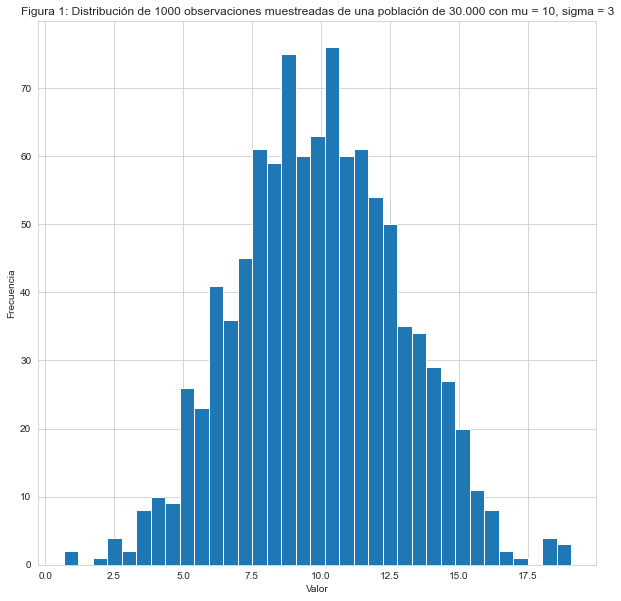

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mod1 = lambda t:np.random.normal(10,3,t)

#Formar una población de 30,000 individuos, con promedio = 10 y escala = 3
population = mod1(30000)
# Supongamos que solo podemos observar a 1,000 de estos individuos.
observation = population[np.random.randint(0, 30000, 1000)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=35)
ax.set_xlabel("Valor")
ax.set_ylabel("Frecuencia")
ax.set_title("Figura 1: Distribución de 1000 observaciones muestreadas de una población de 30.000 con mu = 10, sigma = 3")
mu_obs=observation.mean()
mu_obs

plt.show()

[likelihood_computer](https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/) y [normal distribution](https://www.onlinemathlearning.com/normal-distribution.html)

![img](https://www.onlinemathlearning.com/image-files/normal-distribution-formula.png)

----

En estadística, la función de verosimilitud (a menudo llamada simplemente verosimilitud | **likelihood**) mide la bondad de ajuste de un modelo estadístico a una muestra de datos para valores dados de los parámetros desconocidos. 


Se forma a partir de la distribución de probabilidad conjunta de la muestra ([cdf](https://dlsun.github.io/symbulate/joint.html)), pero se considera y se utiliza como una función de los parámetros únicamente, por lo que se tratan las variables aleatorias como fijas en los valores observados.

In [ ]:
#El modelo de transición define cómo pasar de sigma_current a sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5,(1,))]

def prior(x):
    #x [0] = mu, x [1] = sigma (nuevo o actual)
    # devuelve 1 para todos los valores válidos de sigma. Log (1) = 0, por lo que no afecta la suma.
    # devuelve 0 para todos los valores inválidos de sigma (<= 0). Log (0) = - infinito y Log (número negativo) no está definido.
    # Hace que el nuevo sigma sea infinitamente improbable.
    if(x[1] <=0):
        return 0
    return 1

# Calcula la probabilidad de los datos dado un sigma (nuevo o actual)
def manual_log_like_normal(x,data):
    #x [0] = mu, x [1] = sigma (nuevo o actual)
    #data = la observación
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

# Igual que manual_log_like_normal (x, data), pero usando la implementación scipy. Es bastante lento.
def log_lik_normal(x,data):
    #x [0] = mu, x [1] = sigma (nuevo o actual)
    #data = la observación
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


# Define si aceptar o rechazar la nueva muestra
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Como hicimos una probabilidad logarítmica, necesitamos exponenciar para comparar con el número aleatorio
        # es menos probable que x_new sea menos probable que se acepten
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer (x, data): devuelve la probabilidad de que estos parámetros generen los datos
    # transition_model (x): una función que extrae una muestra de una distribución simétrica y la devuelve
    # param_init: una muestra inicial
    # iterations: número de aceptadas a generadas
    # data: los datos que deseamos modelar
    # accept_rule (x, x_new): decide si aceptar o rechazar la nueva muestra
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [ ]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,observation,acceptance)

In [ ]:
accepted[-10:,1]

array([array([2.98581743]), array([2.9278803]), array([2.88511064]),
       array([2.94541361]), array([2.8242307]), array([3.05467098]),
       array([3.06270992]), array([2.99125185]), array([3.01896217]),
       array([3.05036058])], dtype=object)

In [ ]:
print(accepted.shape)

(8279, 2)


(8279, 2)

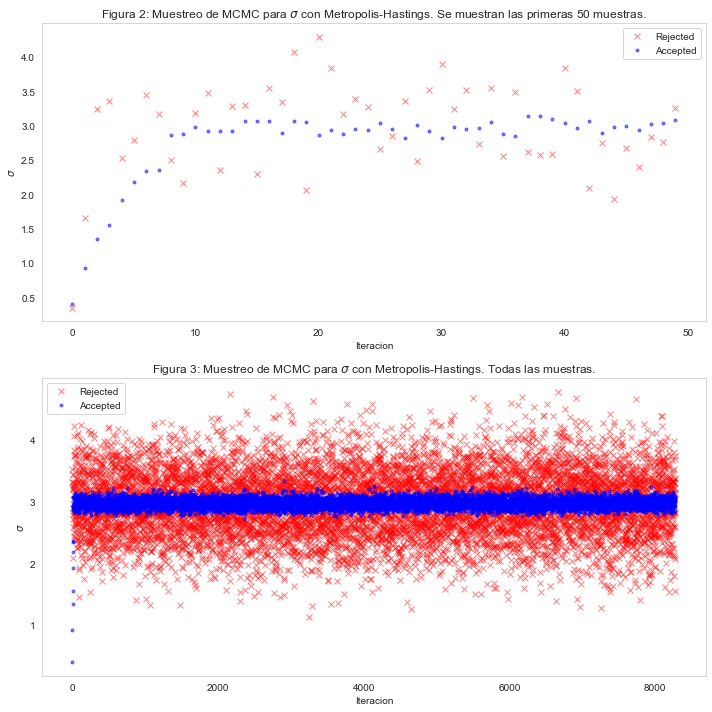

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteracion")
ax.set_ylabel("$\sigma$")
ax.set_title("Figura 2: Muestreo de MCMC para $\sigma$ con Metropolis-Hastings. Se muestran las primeras 50 muestras.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
# Descarte para visualizar ambos valores
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteracion")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figura 3: Muestreo de MCMC para $\sigma$ con Metropolis-Hastings. Todas las muestras.")
ax2.grid()
ax2.legend()

fig.tight_layout()
accepted.shape

Como vemos, las distribuciones estimadas utilizando MCMC se acercan bastante a las distribuciones reales.

In [ ]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

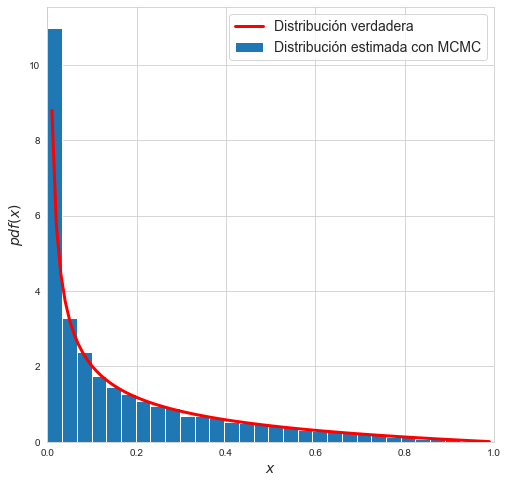

In [ ]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

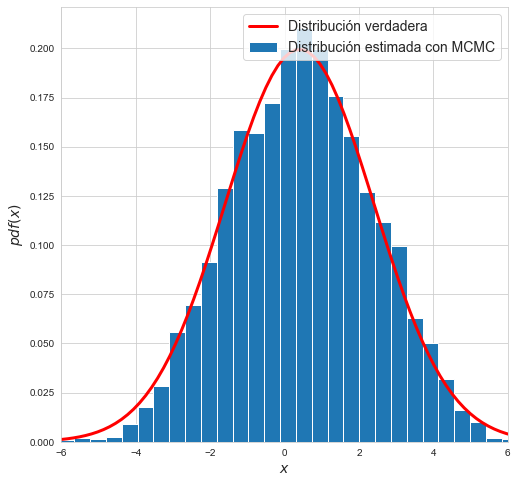

In [ ]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Como vemos, las distribuciones estimadas utilizando MCMC se acercan bastante a las distribuciones reales.

# Ejemplo de algo real...

Una mancha solar es una región de la superficie del Sol (fotosfera) que está marcada por una temperatura más baja que su entorno. 

Las manchas solares suelen aparecer en pares de polaridad magnética opuesta. Su número varía según el ciclo solar de aproximadamente 11 años.

----

Los datos en los que trabajaremos son el "Número medio mensual de manchas solares totales", para cada mes desde enero de 1749 hasta noviembre de 2018. Se trata de datos recopilados, seleccionados y puestos a disposición del público por el [Centro Mundial de Datos para la producción, preservación y difusión de el número internacional de manchas solares](http://www.sidc.be/silso/home).

(3238,) (3238,)
1785.042


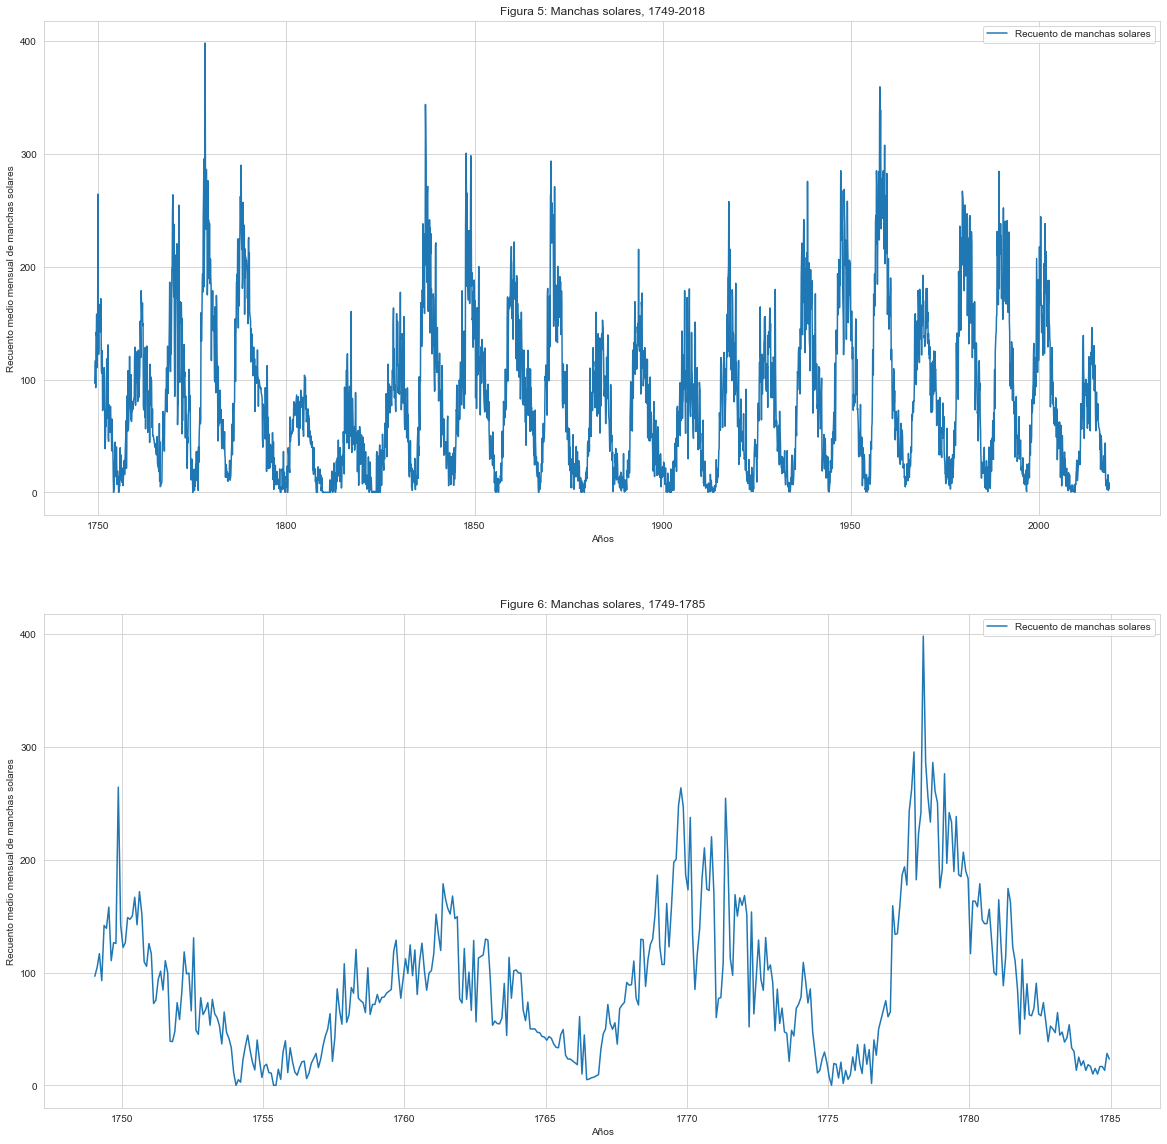

In [ ]:
sunspots = np.loadtxt("https://raw.githubusercontent.com/DCDPUAEM/DCDP_2022/main/Tema_2_AnalisisEstadistico/data/test.csv", delimiter=';')

#years is the third column
years = sunspots[:,2]
#activity is the 4th column
activity = sunspots[:,3] + 0.1
print(years.shape,activity.shape)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2,1,1)

ax.plot(years, activity, label="Recuento de manchas solares")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Años")
ax.set_ylabel("Recuento medio mensual de manchas solares")
ax.set_title("Figura 5: Manchas solares, 1749-2018")
ax.legend()


ax = fig.add_subplot(2,1,2)
print(years[432])
ax.plot(years[:432], activity[:432], label="Recuento de manchas solares")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Años")
ax.set_ylabel("Recuento medio mensual de manchas solares")
ax.set_title("Figure 6: Manchas solares, 1749-1785")
ax.legend()

Parece que podríamos modelar este fenómeno con alguna distribución, con un nuevo ciclo que se reinicia cada 11-12 años.


--

Una distribución [gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma) $\Gamma$ es una familia de dos parámetros de distribuciones de probabilidad continuas, los parámetros son la forma a y la escala b. Una variable aleatoria X que tiene distribución gamma se indica $X ~ \Gamma (a, b)$, y en nuestro caso X es el recuento de manchas solares. Los dos parámetros a y b son las incógnitas para las que nos gustaría calcular las distribuciones.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Gamma_distribution_pdf.png/440px-Gamma_distribution_pdf.png)

Por ejemplo, en el primer ciclo, el recuento de manchas solares comienza desde su máximo en alrededor de 300 a fines de 1749, y cae al mínimo 6 años después, durante 1755. Luego, el número aumenta nuevamente a su máximo durante 1761 y 1762 antes. cayendo de nuevo durante 1766 y así sucesivamente ...

### Asegurémonos trazando un histograma de recuentos de manchas solares:

Text(0.5, 1.0, 'Figura 7: Histograma que muestra la frecuencia del recuento de manchas solares durante 270 años (1749-2018)')

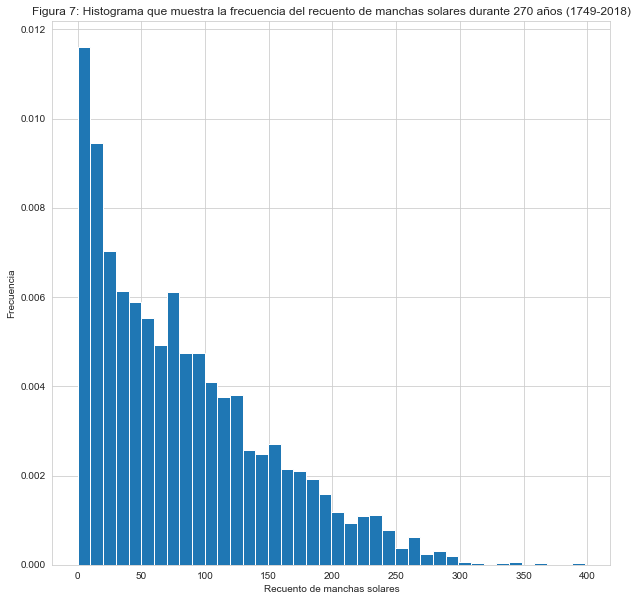

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(activity, bins=40, density=True)
ax.set_xlabel("Recuento de manchas solares")
ax.set_ylabel("Frecuencia")
ax.set_title("Figura 7: Histograma que muestra la frecuencia del recuento de manchas solares durante 270 años (1749-2018)")

In [ ]:
transition_model = lambda x: np.random.normal(x,[0.05,5],(2,))
import math
def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))

In [ ]:
accepted, rejected = metropolis_hastings(manual_log_lik_gamma,prior,transition_model,[4, 10], 50000,activity,acceptance)

In [ ]:
print(accepted.shape)
accepted[-10:]

(8553, 2)


array([[ 0.97985495, 84.41764005],
       [ 0.97394601, 85.74101851],
       [ 1.01014496, 83.34787208],
       [ 0.99601246, 82.91167432],
       [ 0.99704836, 82.42052543],
       [ 1.01902908, 80.13373803],
       [ 0.97814933, 86.45245181],
       [ 0.98494011, 87.34618621],
       [ 0.98600865, 84.91879887],
       [ 0.97247271, 86.96586878]])

A partir de a = 4 y b = 10, el algoritmo aceptó aproximadamente más de 8000 pares de muestras (puede variar por el uso de la semilla), están bastante lejos de los valores iniciales.....

---

Al igual que con el ejemplo de datos ficticios, veamos cómo el algoritmo se abrió camino hacia estos valores:

Text(0.5, 1.0, 'Figura 10: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran las últimas 50 muestras.')

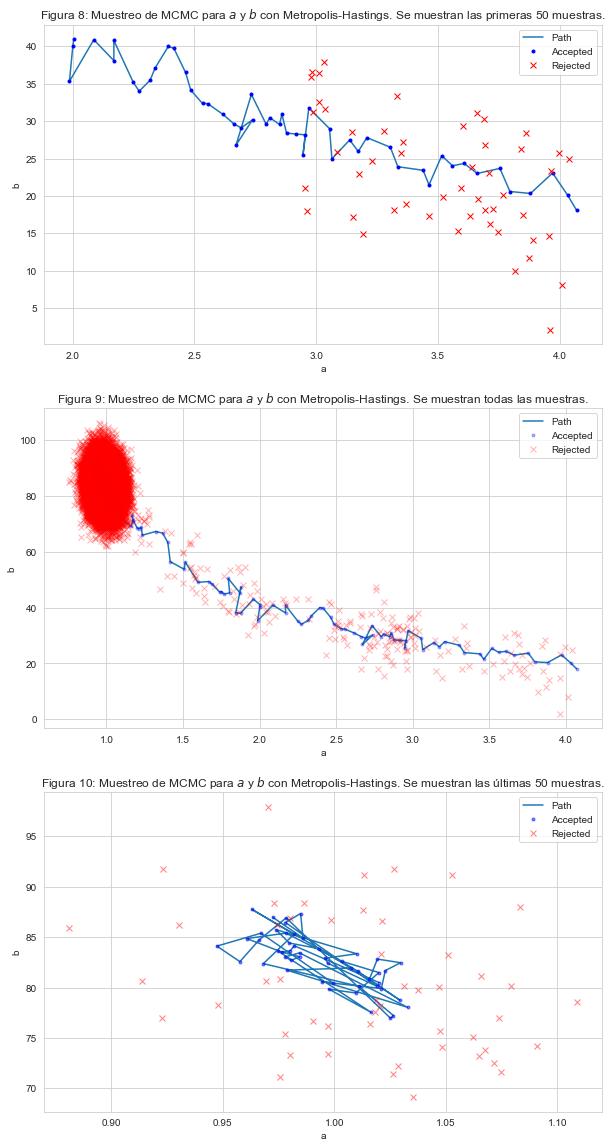

In [ ]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura 8: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran las primeras 50 muestras.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura 9: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran todas las muestras.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura 10: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran las últimas 50 muestras.")

Como podemos ver en las figuras 8, 9 y 10, el algoritmo converge rápidamente a la zona [a = 1, b = 85].

Sugerencia: cuando el algoritmo comienza a rechazar muestras en gran medida, eso significa que hemos alcanzado una zona de saturación de probabilidad. Por lo general, esto se puede interpretar como haber alcanzado el espacio de parámetros óptimo del que podemos muestrear, es decir, hay muy pocas razones para que el algoritmo acepte nuevos valores. Esto está marcado en las figuras 9 y 10 donde el algoritmo ya no acepta ningún valor fuera de un rango pequeño.

Text(0.5, 1.0, 'Histograma 2D que muestra la distribución conjunta de $a$ y $b$')

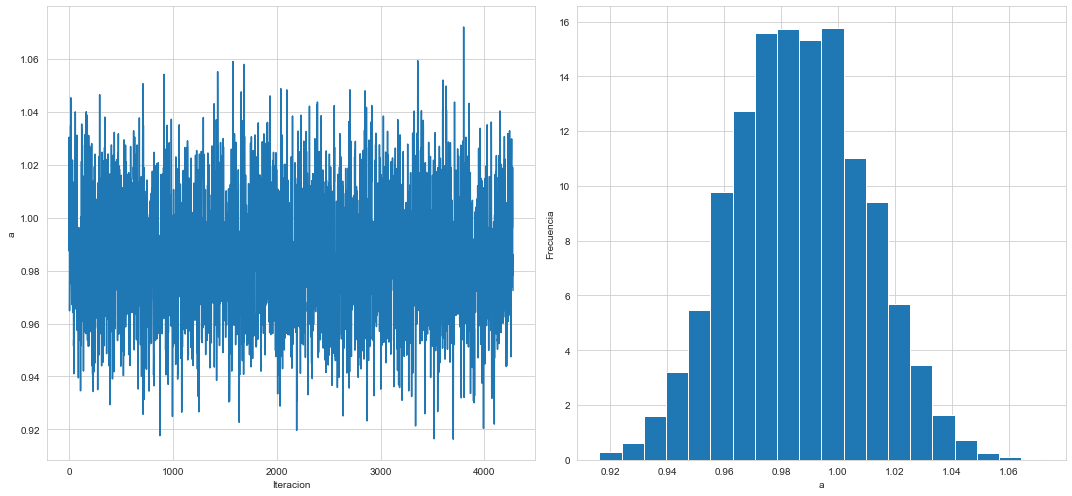

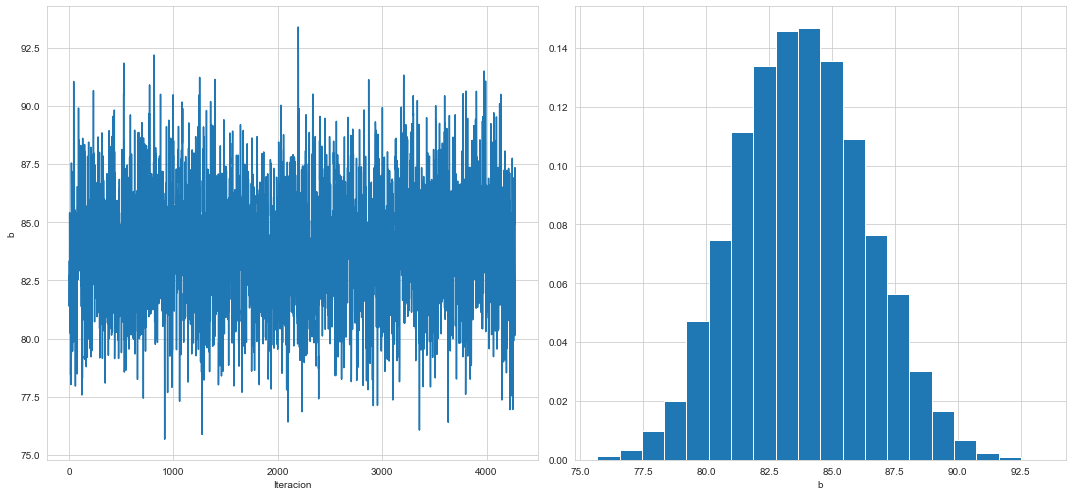

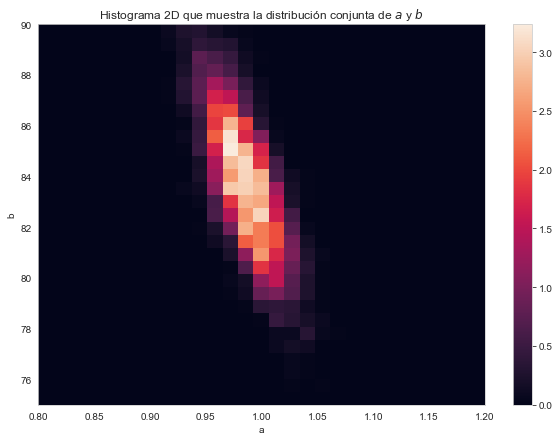

In [ ]:
show=int(-0.5*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_xlabel("Iteracion")
ax.set_ylabel("a")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True)
ax.set_ylabel("Frecuencia")
ax.set_xlabel("a")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_xlabel("Iteracion")
ax.set_ylabel("b")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True)
ax.set_xlabel("b")
fig.tight_layout()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
xbins, ybins = np.linspace(0.8,1.2,30), np.linspace(75,90,30)
counts, xedges, yedges, im = ax.hist2d(accepted[hist_show:,0], accepted[hist_show:,1], density=True, bins=[xbins, ybins])
ax.set_xlabel("a")
ax.set_ylabel("b")
fig.colorbar(im, ax=ax)
ax.set_title("Histograma 2D que muestra la distribución conjunta de $a$ y $b$")

### Tiempo de predicción

Primero, promediamos el último 50% de las muestras aceptadas de a y b, y generamos individuos aleatorios a partir de una distribución $\Gamma$. $ a_ {promedio} $ = 0.9866200759935773 y $ b_ {promedio} $ = 83.70749712447888.

0.9862296376406009 83.80337828320752


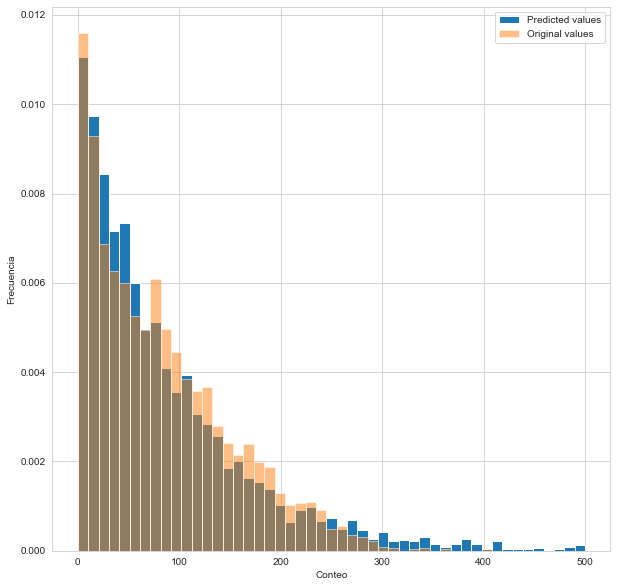

In [ ]:
show=-int(0.5*accepted.shape[0])

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)
t=np.arange(activity.shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)



ax.hist( observation_gen,bins=np.linspace(0,500,50) ,density=True,label="Predicted values")
ax.hist( activity,bins=np.linspace(0,500,50) ,alpha=0.5,density=True, label="Original values")
ax.set_xlabel("Conteo")
ax.set_ylabel("Frecuencia")
ax.legend()

### Evaluación de la distribución de la propuesta

¿Cómo especificamos los parámetros para la distribución Q? ¿Deberíamos alejarnos de la muestra actual $\Theta$ o permanecer relativamente cerca? Estas preguntas se pueden responder midiendo la autocorrelación entre las muestras aceptadas: no queremos que las muestras aceptadas estén demasiado correlacionadas entre sí. No queremos que las muestras distantes estén demasiado correlacionadas ya que estamos tratando de implementar una cadena de Markov, es decir, una muestra solo debe depender de su muestra anterior, y la gráfica de autocorrelación debe mostrar una disminución rápida y exponencial entre la correlación de la muestra i y i-1, i-2, ... etc

0.9862296376406009 83.80337828320752


[Text(0.5, 0, 'lag'), Text(0, 0.5, 'autocorrelation'), (-0.1, 1.0)]

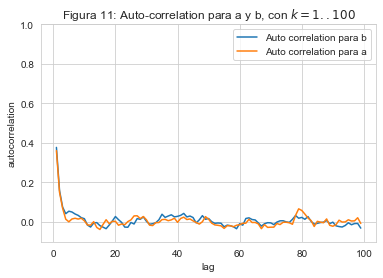

In [ ]:
mean_acc_0=accepted[show:,0].mean()
mean_acc_1=accepted[show:,1].mean()
print(mean_acc_0,mean_acc_1)

lag=np.arange(1,100)
def autocorr(accepted,lag):
    num_0=0
    denom_0=0
    num_1=0
    denom_1=0
    for i in range(accepted.shape[0]-lag):
        num_0+=(accepted[i,0]-mean_acc_0)*(accepted[i+lag,0]-mean_acc_0)
        num_1+=(accepted[i,1]-mean_acc_1)*(accepted[i+lag,1]-mean_acc_1)
        denom_0+=(mean_acc_0-accepted[i,0])**2
        denom_1+=(mean_acc_1-accepted[i,1])**2
    rk_0=num_0/denom_0
    rk_1=num_1/denom_1
    return rk_0, rk_1


accepted_reversed=accepted[show:,:]
result=np.zeros((2,lag.shape[0]))
#print(lag)
for l in lag:
    result[:,l-1]=autocorr(accepted_reversed,l)
    
    
###Instead of writing an autocorrelation function, one could simply use thee autocorr function provided in pymc3    
#from pymc3.stats import autocorr

fig, ax = plt.subplots()
#ax.plot(lag, [autocorr(accepted[show:,1], l) for l in lags], label='auto b')
#ax.plot(lag, [autocorr(accepted[show:,0], l) for l in lags], label='auto a')
ax.plot(lag, result[1,:], label='Auto correlation para b')
ax.plot(lag, result[0,:], label='Auto correlation para a')
ax.legend(loc=0)
ax.set_title("Figura 11: Auto-correlation para a y b, con $k=1..100$")
ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))

En nuestro caso, tenemos la suerte de tener una correlación lo suficientemente baja. En general, es posible que queramos configurar los parámetros de distribución de la propuesta, Q, automáticamente, un método común es seguir ajustando los parámetros de la propuesta para que se rechacen más del 50% de las propuestas. Alternativamente, se podría usar una versión mejorada de MCMC llamada [Hamiltonian Monte Carlo](https://towardsdatascience.com/python-hamiltonian-monte-carlo-from-scratch-955dba96a42d), que reduce la correlación entre los sucesivos estados muestreados y alcanza la distribución estacionaria más rápidamente.

---

### Conclusión

Si bien la abstracción detrás de este algoritmo puede parecer fuera de alcance al principio, la implementación es bastante simple y da resultados asombrosos. De hecho, lo mejor de la programación probabilística, en particular MCMC, es que solo necesita escribir el modelo y luego ejecutarlo. No es necesario calcular la evidencia ni asegurar algunas propiedades matemáticas restrictivas.

---
---
---
<a id="f"></a>
<h1><center>Referencias y links de interés</center></h1>

[Regreso a contenido](#contenido)

---

* [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros)
* Información extra de [Métodos Monte Carlo](https://www.statisticshowto.com/monte-carlo-simulation/)
* Información sobre algoritmo [Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)
* M. Matsumoto and T. Nishimura (1998) - [Mersenne twister: a 623-dimensionally equidistributed uniform pseudo-random number generator](https://dl.acm.org/doi/10.1145/272991.272995)

* [Cadenas de Markov](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50)
* [Más de MCMC](http://people.duke.edu/~ccc14/sta-663/MCMC.html)

**Tutoriales MCMC**
* [Tutorial MCMC - Inferencia Bayesiana](https://nbviewer.org/github/yoyolin/mcmc-tutorial/blob/master/MCMC_for_Bayesian_Inference.ipynb)

* [Otro ejemplo MCMC](https://github.com/prappleizer/prappleizer.github.io/blob/master/Tutorials/MCMC/MCMC_Tutorial_Solution.ipynb)

* [Artículo - Data Analysis Recipes: Using MCMC](https://iopscience.iop.org/article/10.3847/1538-4365/aab76e/pdf)
--------

* La [falacia del jugador: qué es y cómo nos afecta](https://psicologiaymente.com/psicologia/falacia-del-jugador)
* [Funciones en python](https://docs.python.org/3/tutorial/classes.html)

* [Función lambda](https://www.w3schools.com/python/python_lambda.asp)
* [likelihood_computer](https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/) y [normal distribution](https://www.onlinemathlearning.com/normal-distribution.html)
* [cdf](https://dlsun.github.io/symbulate/joint.html)
